# Tutorial 2: How to perform AA test    

_An A/A test is a variation of an A/B test, the peculiarity of which is that the original is compared with itself, as opposed to an A/B test, which compares samples before and after exposure._

## 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from hypex import AATest
from hypex.utils.tutorial_data_creation import create_test_data

pd.options.display.float_format = '{:,.2f}'.format

np.random.seed(52)  # needed to create example data

In [2]:
def show_result(result):
    for k, v in result.items():
        print(k)
        display(v)
        print()

## 1. Create or upload your dataset
In this case we will create random dataset with known effect size  
If you have your own dataset, go to the part 2 

In [7]:
data = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'])
data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,488.00,414.44,NaN,M,E-commerce
1,3,0,0,501.50,424.33,31.00,NaN,Logistics
2,10,0,0,522.50,416.22,64.00,M,E-commerce
3,12,0,0,472.00,423.78,43.00,M,E-commerce
4,13,0,0,508.50,424.22,36.00,F,E-commerce
...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce
5367,9994,0,0,486.00,423.78,27.00,F,Logistics
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce


## 2. AATest 

### 2.0 Initialize parameters
`info_col` used to define informative attributes that should NOT be part of testing, such as user_id and signup_month <br>

In [4]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

### 2.1 Simple AA-test
This is the easiest way to initialize and calculate metrics on a AA-test (default - on 2000 iterations)<br>Use it when you are clear about each attribute or if you don't have any additional task conditions (like grouping)    

You can also add some extra arguments to the process(): 
* plot_set - types of plot, that you want to show ("hist", "cumulative", "percentile")
* figsize - size of figure for plots 
* alpha - value to change the transparency of the histogram plot 
* bins - generic bin parameter that can be the name of a reference rule, the number of bins, or the breaks of the bins 
* title_size - size of title for plots

In [5]:
experiment = AATest(info_cols=info_cols, target_fields=target)

  0%|          | 0/10 [00:00<?, ?it/s]

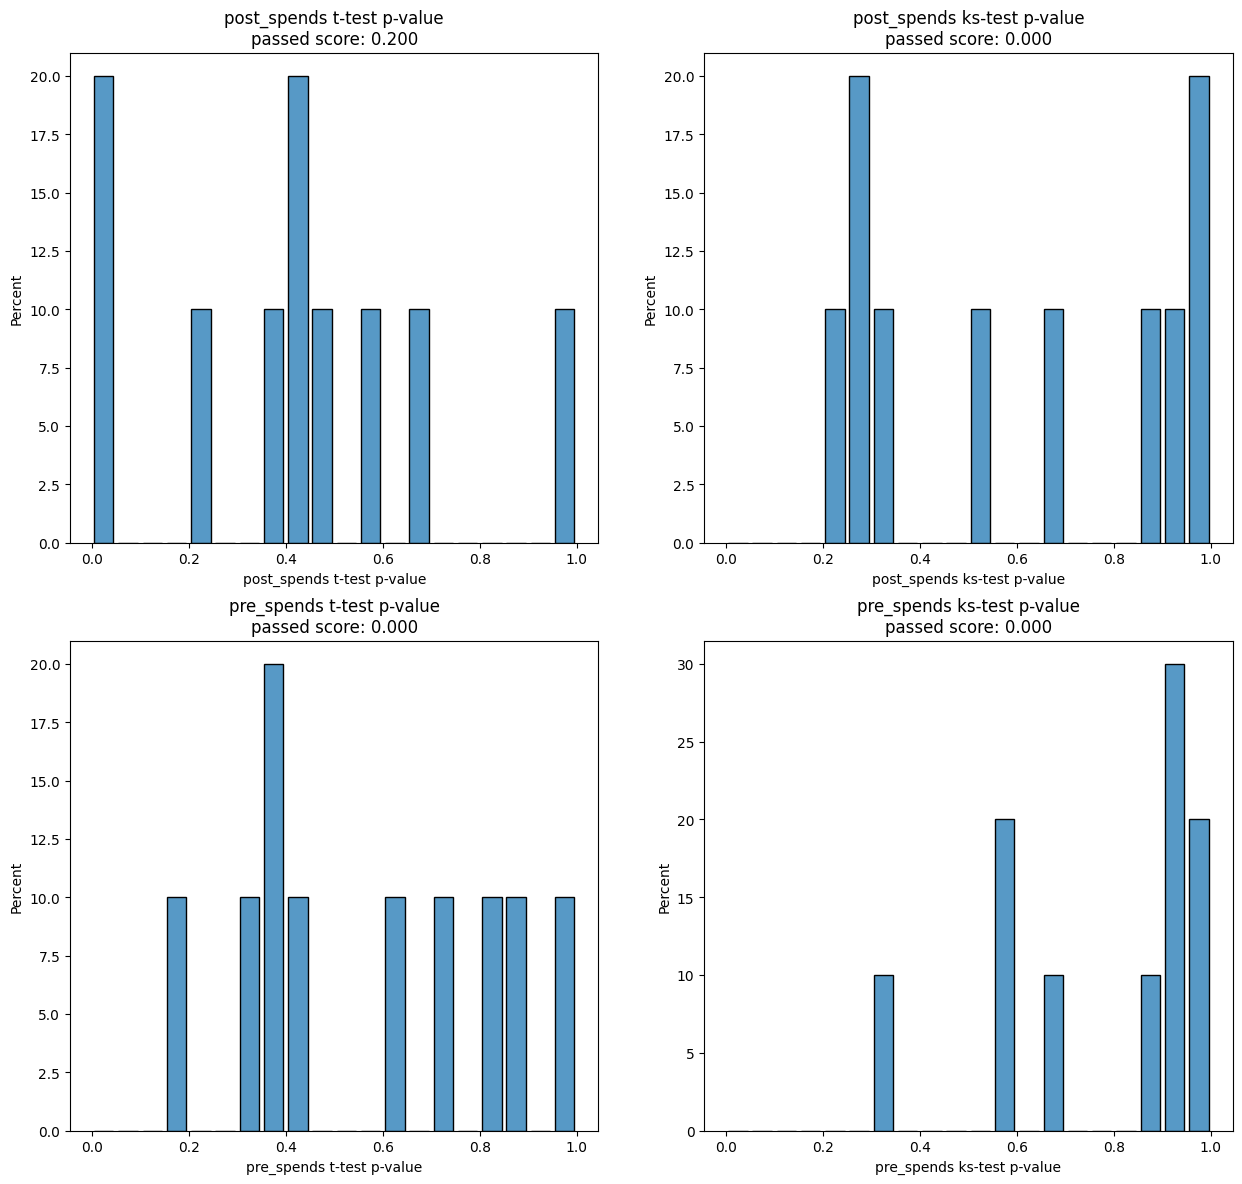

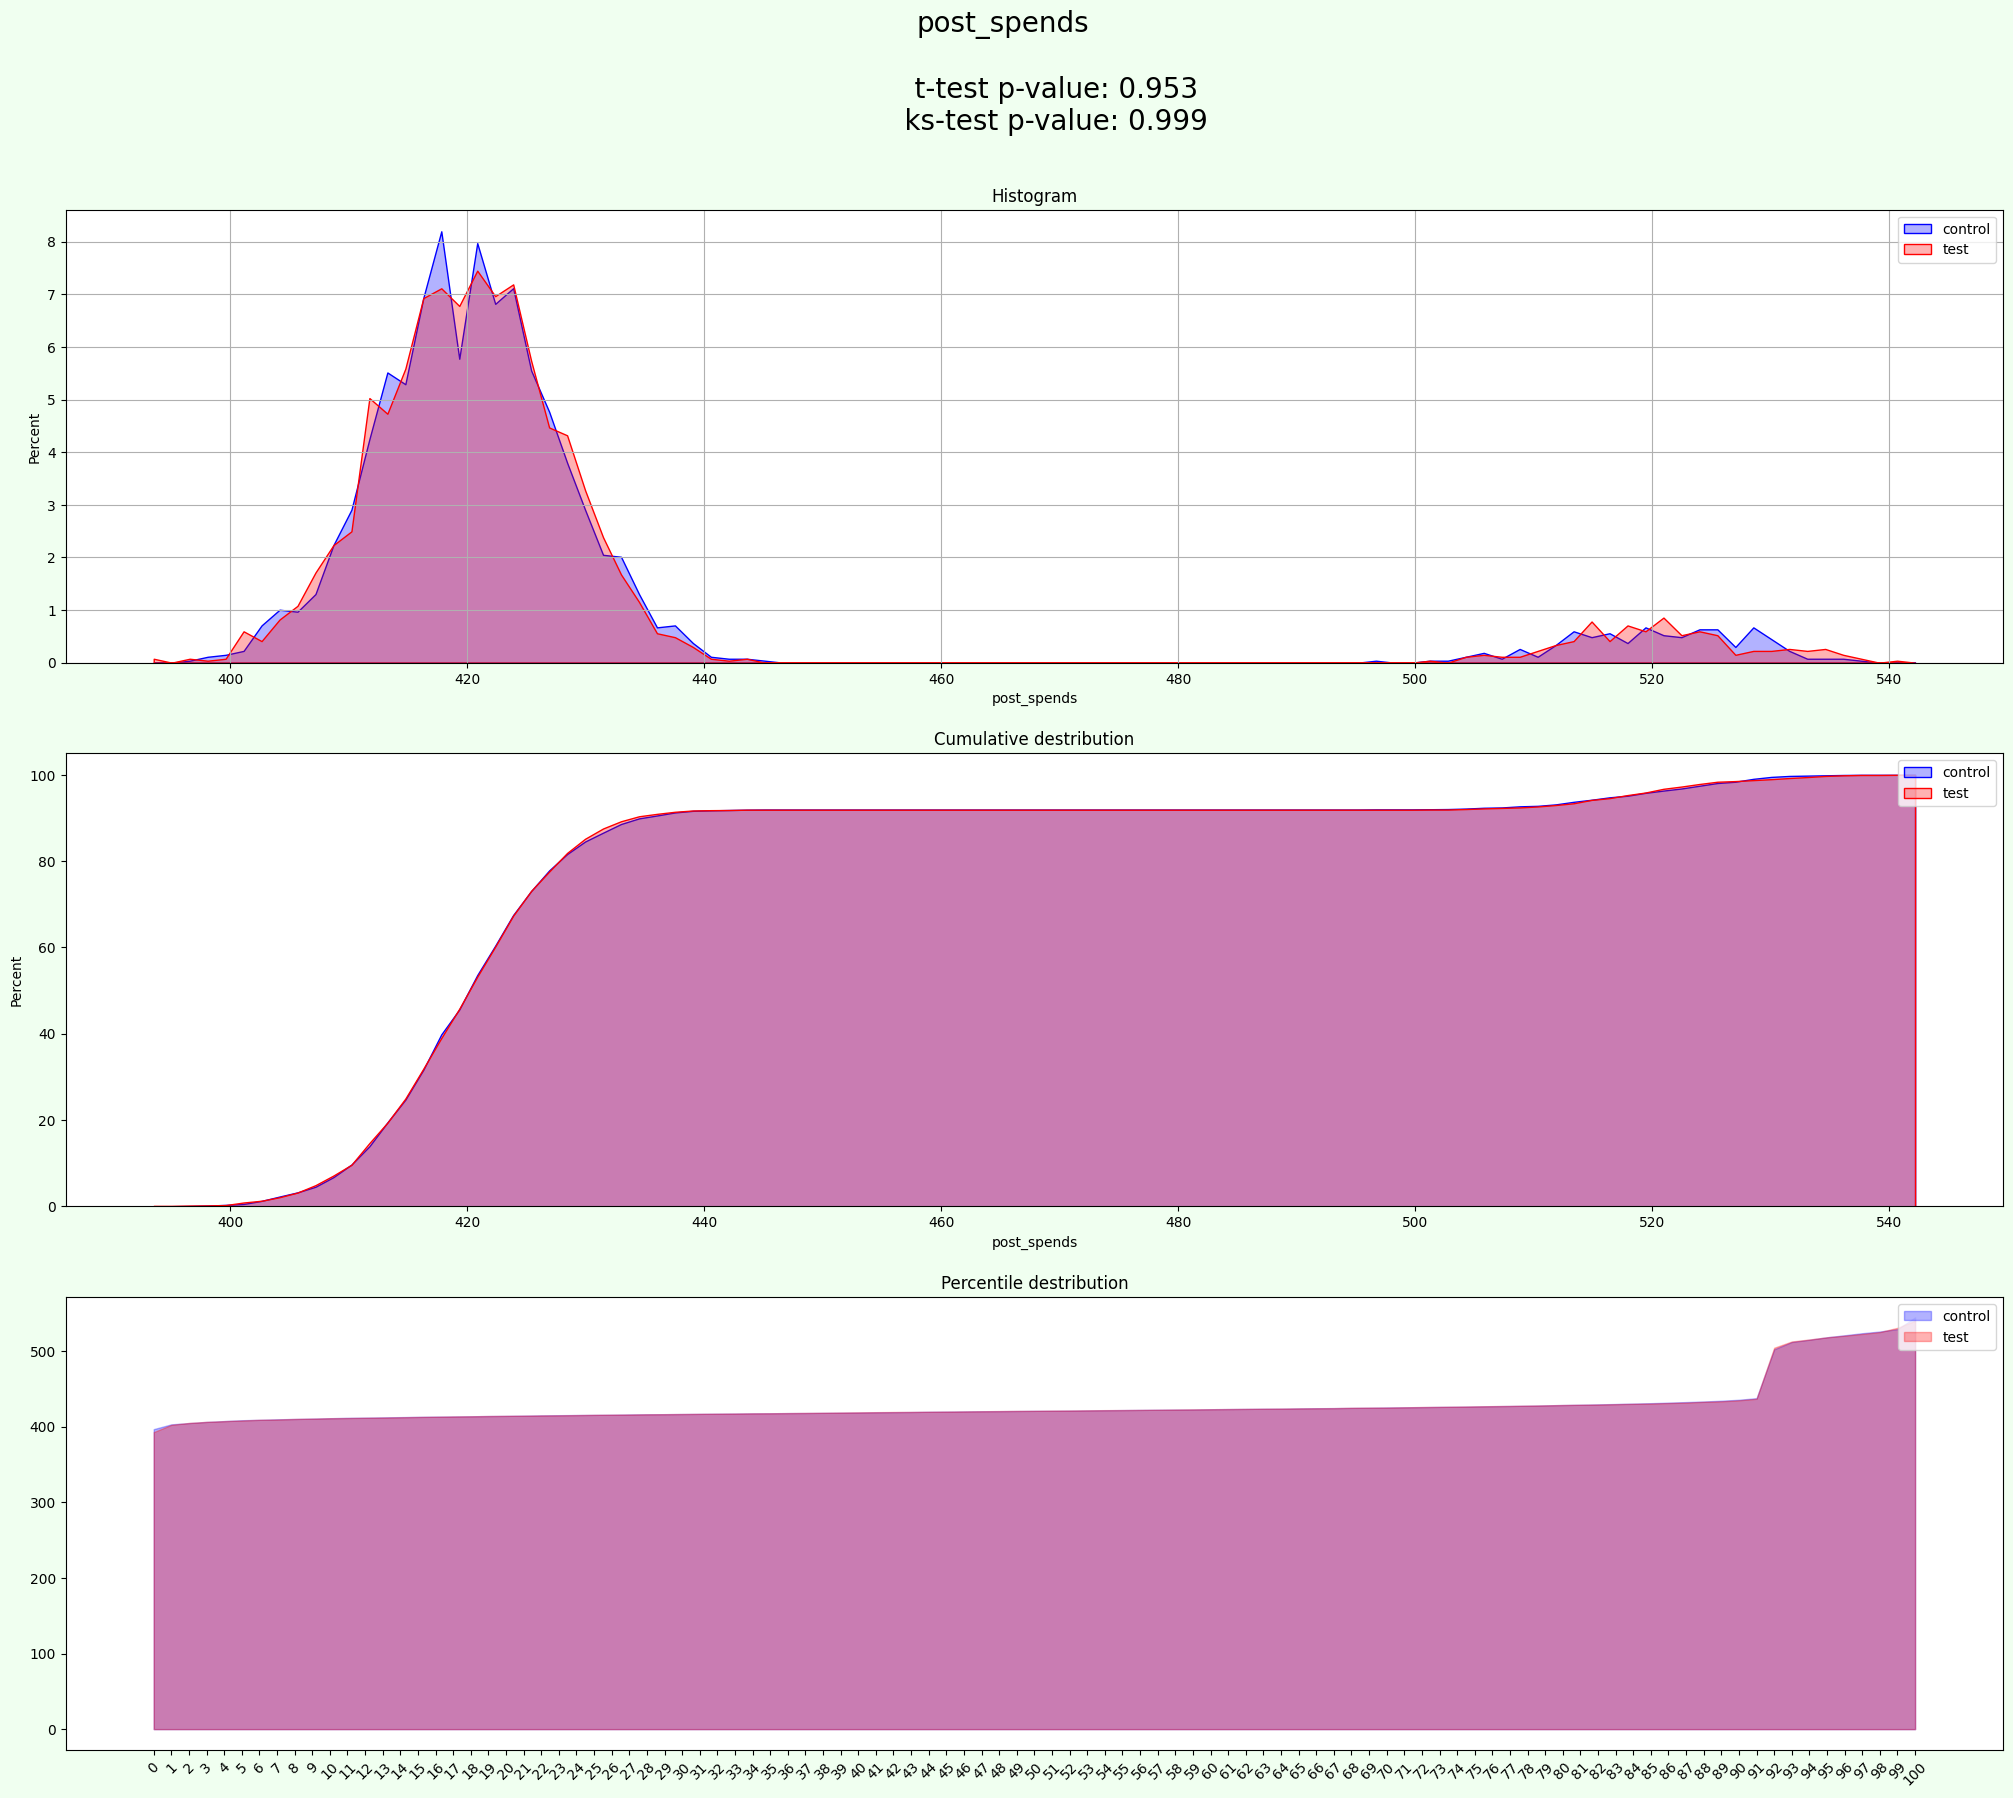

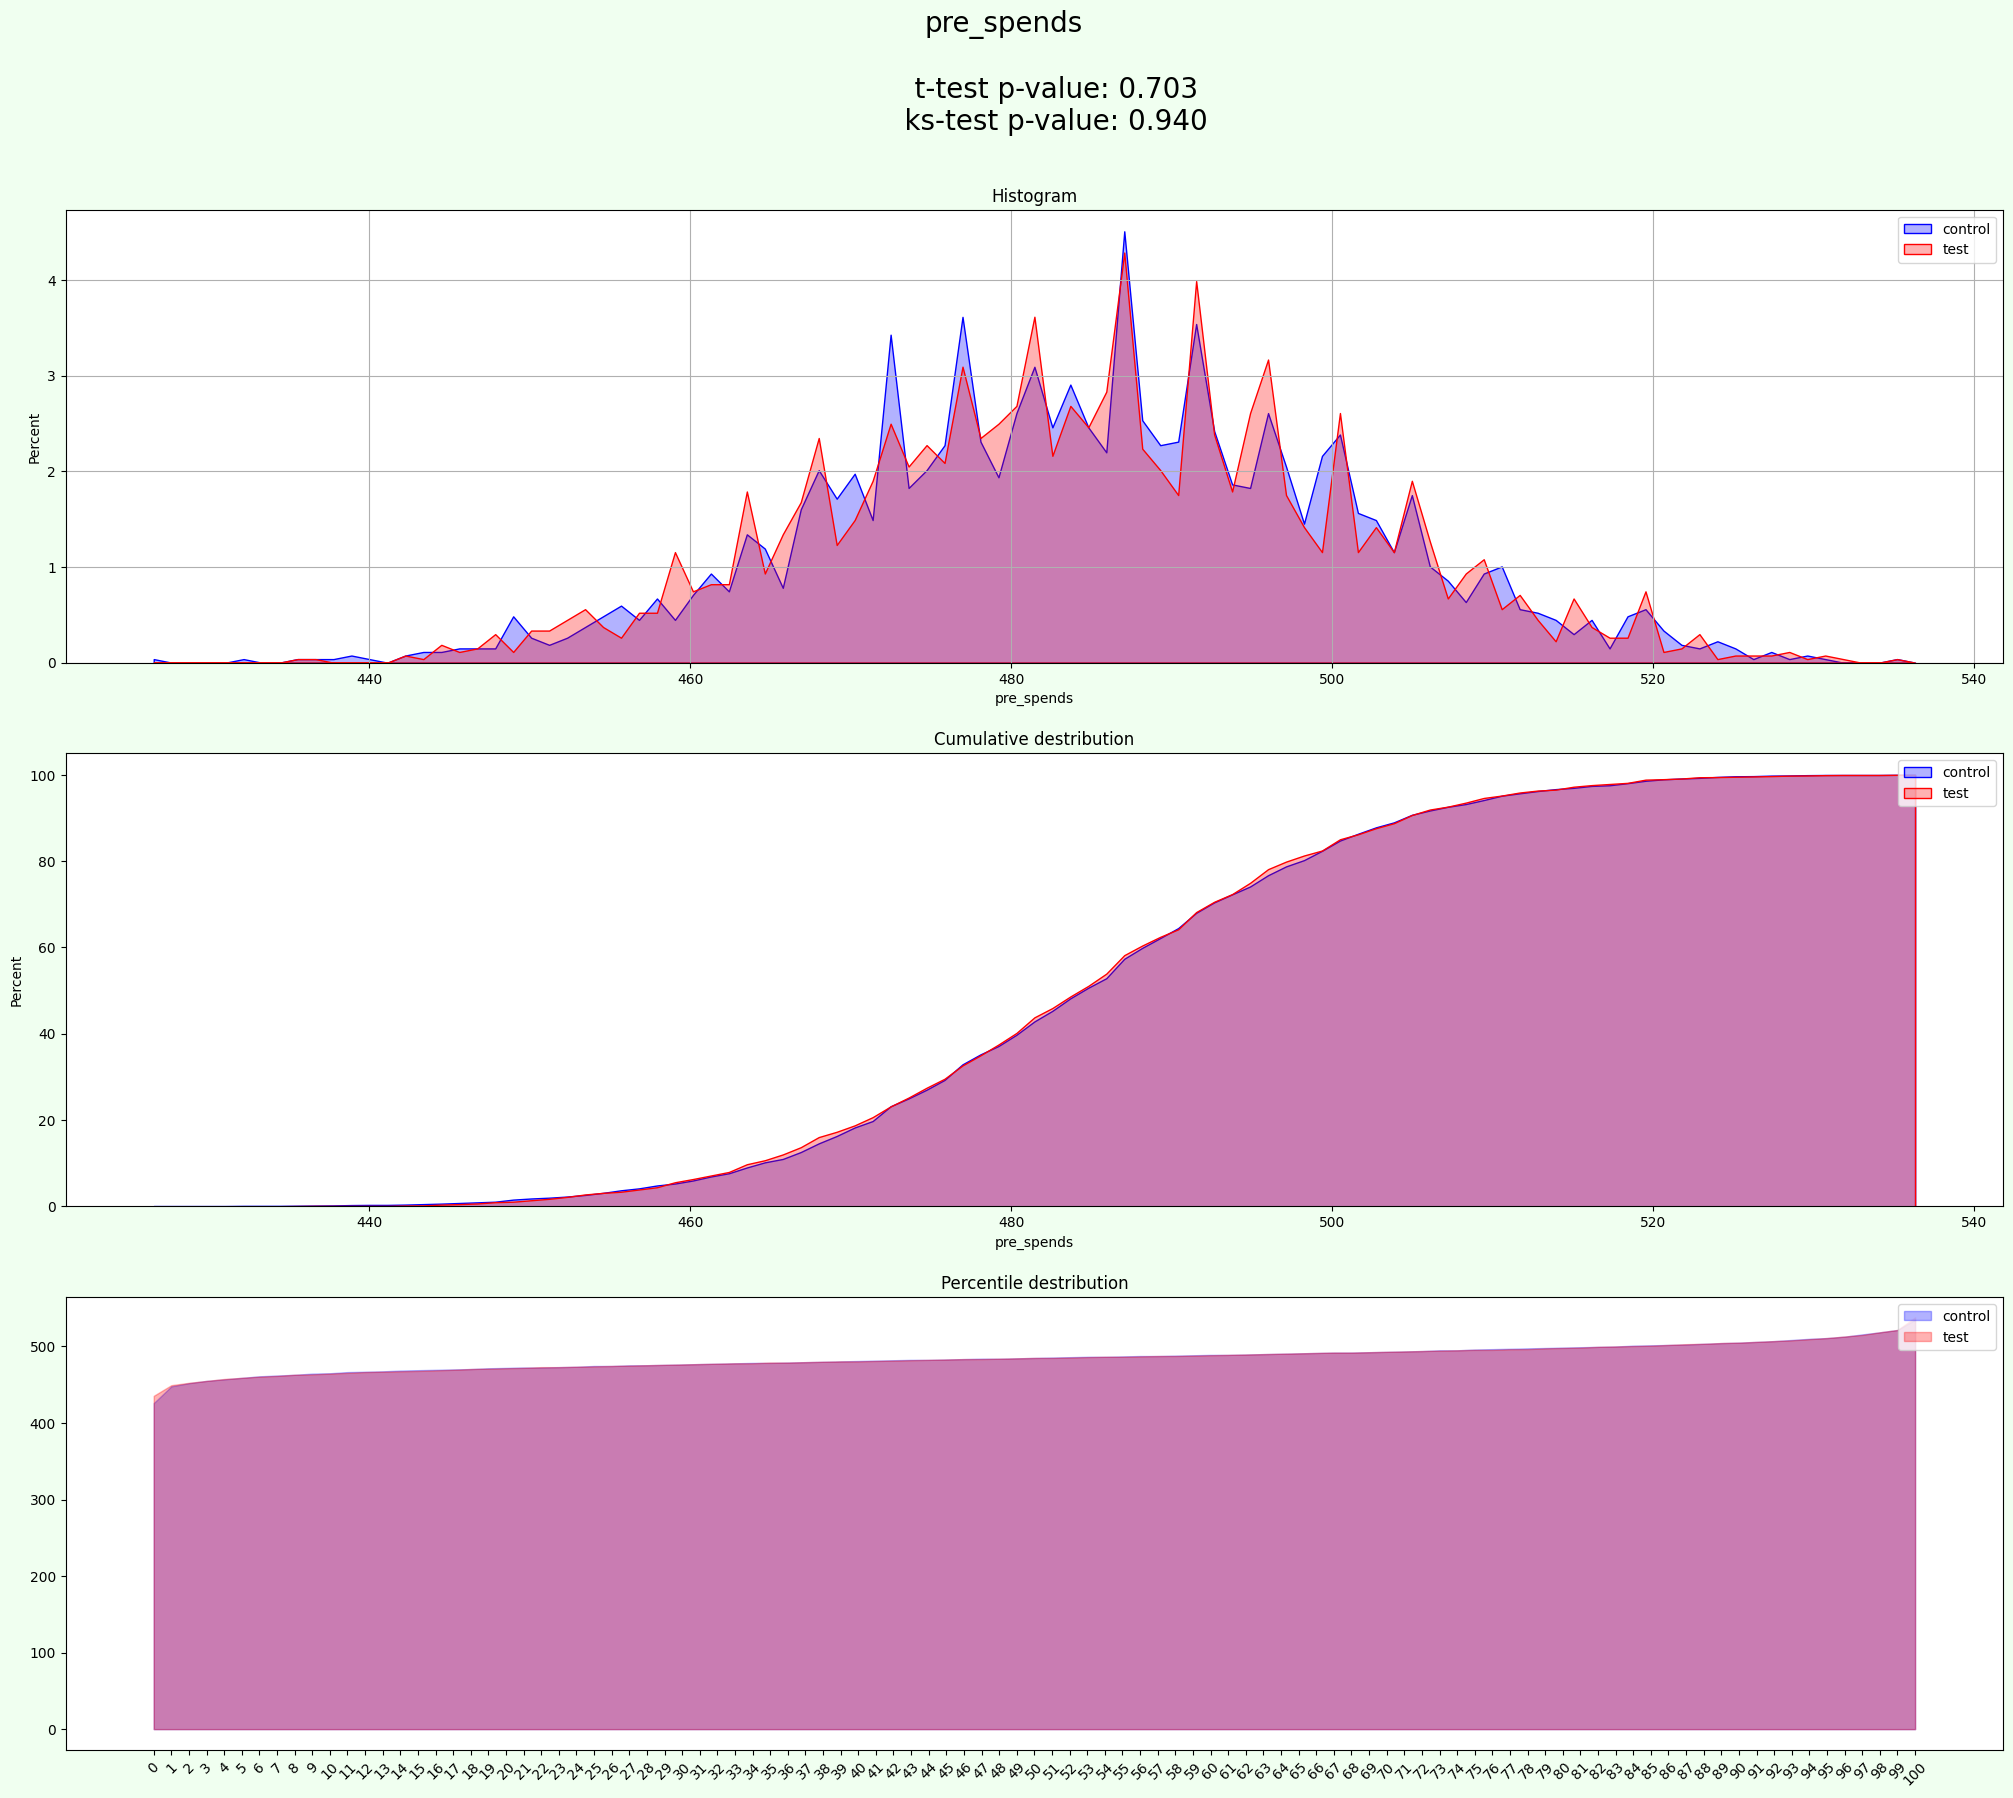

In [6]:
results = experiment.process(data, iterations=10)

In [7]:
results.keys()

dict_keys(['experiments', 'aa_score', 'split', 'best_experiment_stat', 'split_stat', 'resume'])

`results` is a dictionary with dataframes as values.<br>
* 'split' - result of separation, column 'group' contains values 'test' and 'control'  
* 'resume' - summary of all results   
* 'aa_score' - score of T-test and Kolmogorov-Smirnov test 
* 'experiments' - is a table of results of experiments, which includes 
    - means of all targets in a and b samples, 
    - p_values of Student t-test and test Kolmogorova-Smirnova, 
    - and results of tests (did data on the random_state passes the uniform test)
* 'best_experiment_stat' - like previous point but only for the best experiment 
* 'split_stat' - metrics and statistics tests for result of split



In [8]:
results['aa_score']

,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.20,0.00,0.00,0.00
pre_spends,0.00,0.00,0.00,0.00
mean,0.10,0.00,0.00,0.00


In [9]:
results['resume']

,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


### 2.2 Single experiment
To get stable results lets fix `random_state`

In [10]:
random_state = 11

To perform single experiment you can use `sampling_metrics()`

In [11]:
experiment = AATest(info_cols=info_cols, target_fields=target)
metrics, dict_of_datas = experiment.sampling_metrics(data=data, random_state=random_state).values()

The results contains the same info as in multisampling, but on one experiment

In [12]:
metrics

{'random_state': 11,
 'post_spends a mean': 428.5347817090834,
 'post_spends b mean': 427.7893234016139,
 'post_spends ab delta': -0.7454583074695051,
 'post_spends ab delta %': -0.17425827777606262,
 'post_spends t-test p-value': 0.33561550504114157,
 'post_spends ks-test p-value': 0.6263469727648824,
 'post_spends t-test passed': False,
 'post_spends ks-test passed': False,
 'pre_spends a mean': 484.8584729981378,
 'pre_spends b mean': 484.9912476722533,
 'pre_spends ab delta': 0.13277467411546695,
 'pre_spends ab delta %': 0.027376715508320437,
 'pre_spends t-test p-value': 0.7577698697749307,
 'pre_spends ks-test p-value': 0.762662388584242,
 'pre_spends t-test passed': False,
 'pre_spends ks-test passed': False,
 'control %': 50.0,
 'test %': 50.0,
 'control size': 2685,
 'test size': 2685,
 't-test mean p-value': 0.5466926874080361,
 'ks-test mean p-value': 0.6945046806745622,
 't-test passed %': 0.0,
 'ks-test passed %': 0.0,
 'mean_tests_score': 0.6452340162523869}

In [13]:
dict_of_datas[random_state]

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,3,0,0,501.50,424.33,31.00,NaN,Logistics,test
1,14,0,0,497.00,421.78,26.00,M,Logistics,test
2,21,0,0,489.00,433.11,30.00,M,E-commerce,test
3,28,3,1,479.50,527.89,20.00,NaN,E-commerce,test
4,29,0,0,505.00,414.33,30.00,M,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9983,0,0,494.50,428.33,29.00,F,E-commerce,control
5366,9984,0,0,460.00,417.11,66.00,M,Logistics,control
5367,9985,0,0,484.00,411.33,NaN,F,E-commerce,control
5368,9994,0,0,486.00,423.78,27.00,F,Logistics,control


In [14]:
experiment_stat, split_stat = experiment.experiment_result_transform(pd.Series(metrics))

In [15]:
experiment_stat

,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.53,427.79,-0.75,-0.17,0.34,0.63,False,False
pre_spends,484.86,484.99,0.13,0.03,0.76,0.76,False,False


In [16]:
split_stat

control %              50.00
test %                 50.00
control size            2685
test size               2685
t-test mean p-value     0.55
ks-test mean p-value    0.69
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.65
dtype: object

### 2.3 AA-test with grouping

To perform experiment that separates samples by groups `group_col` can be used

In [17]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [18]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

  0%|          | 0/19 [00:00<?, ?it/s]

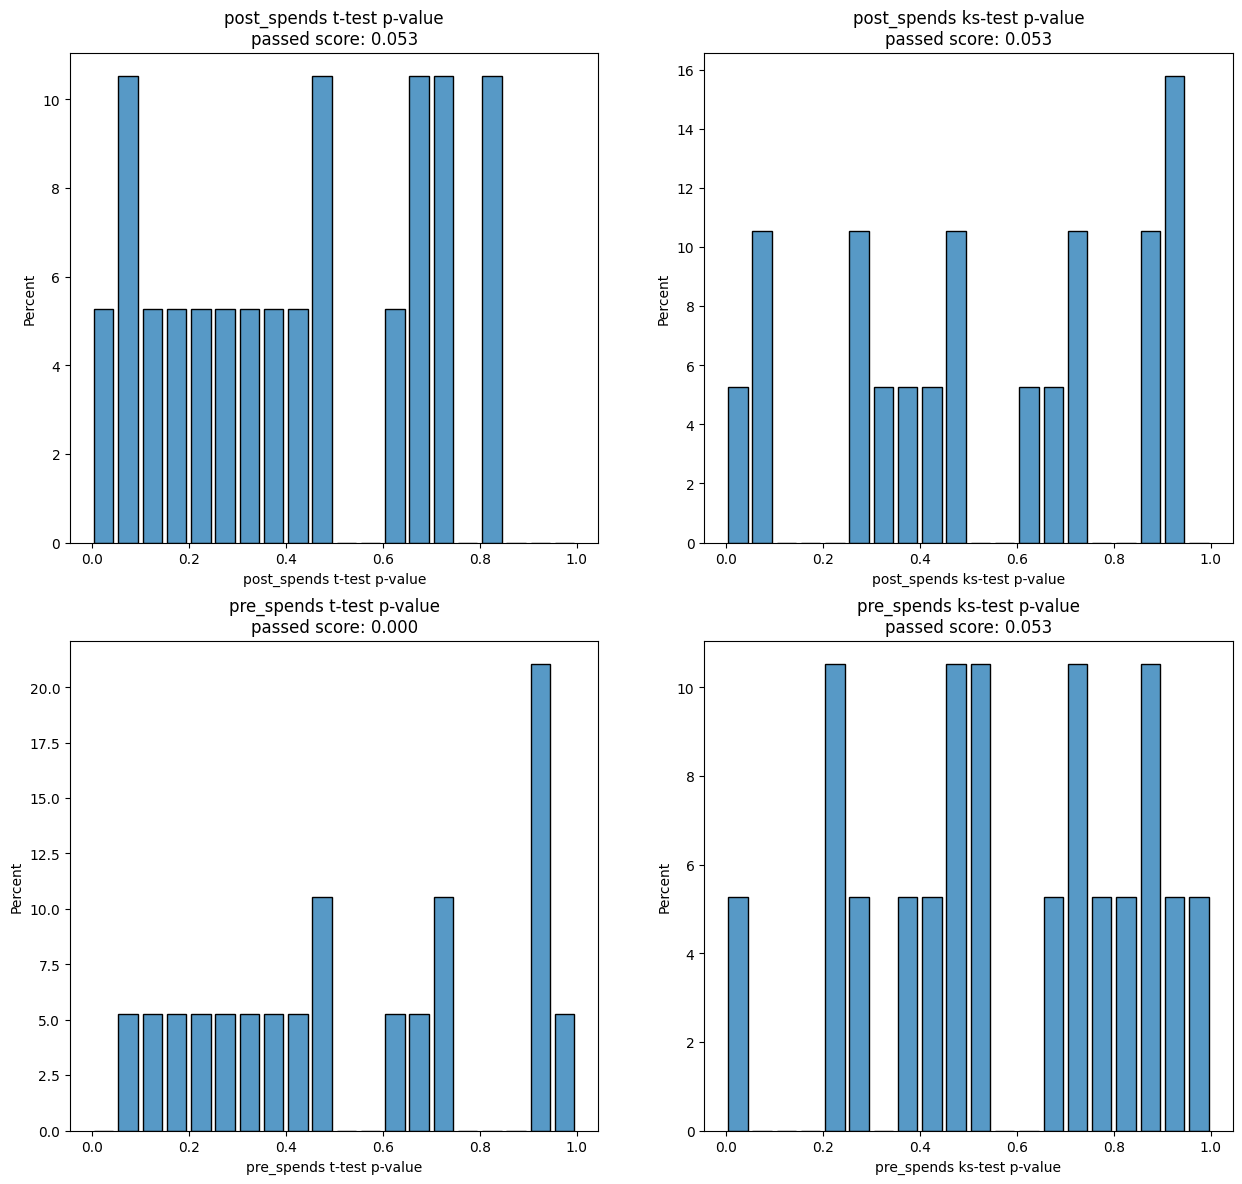

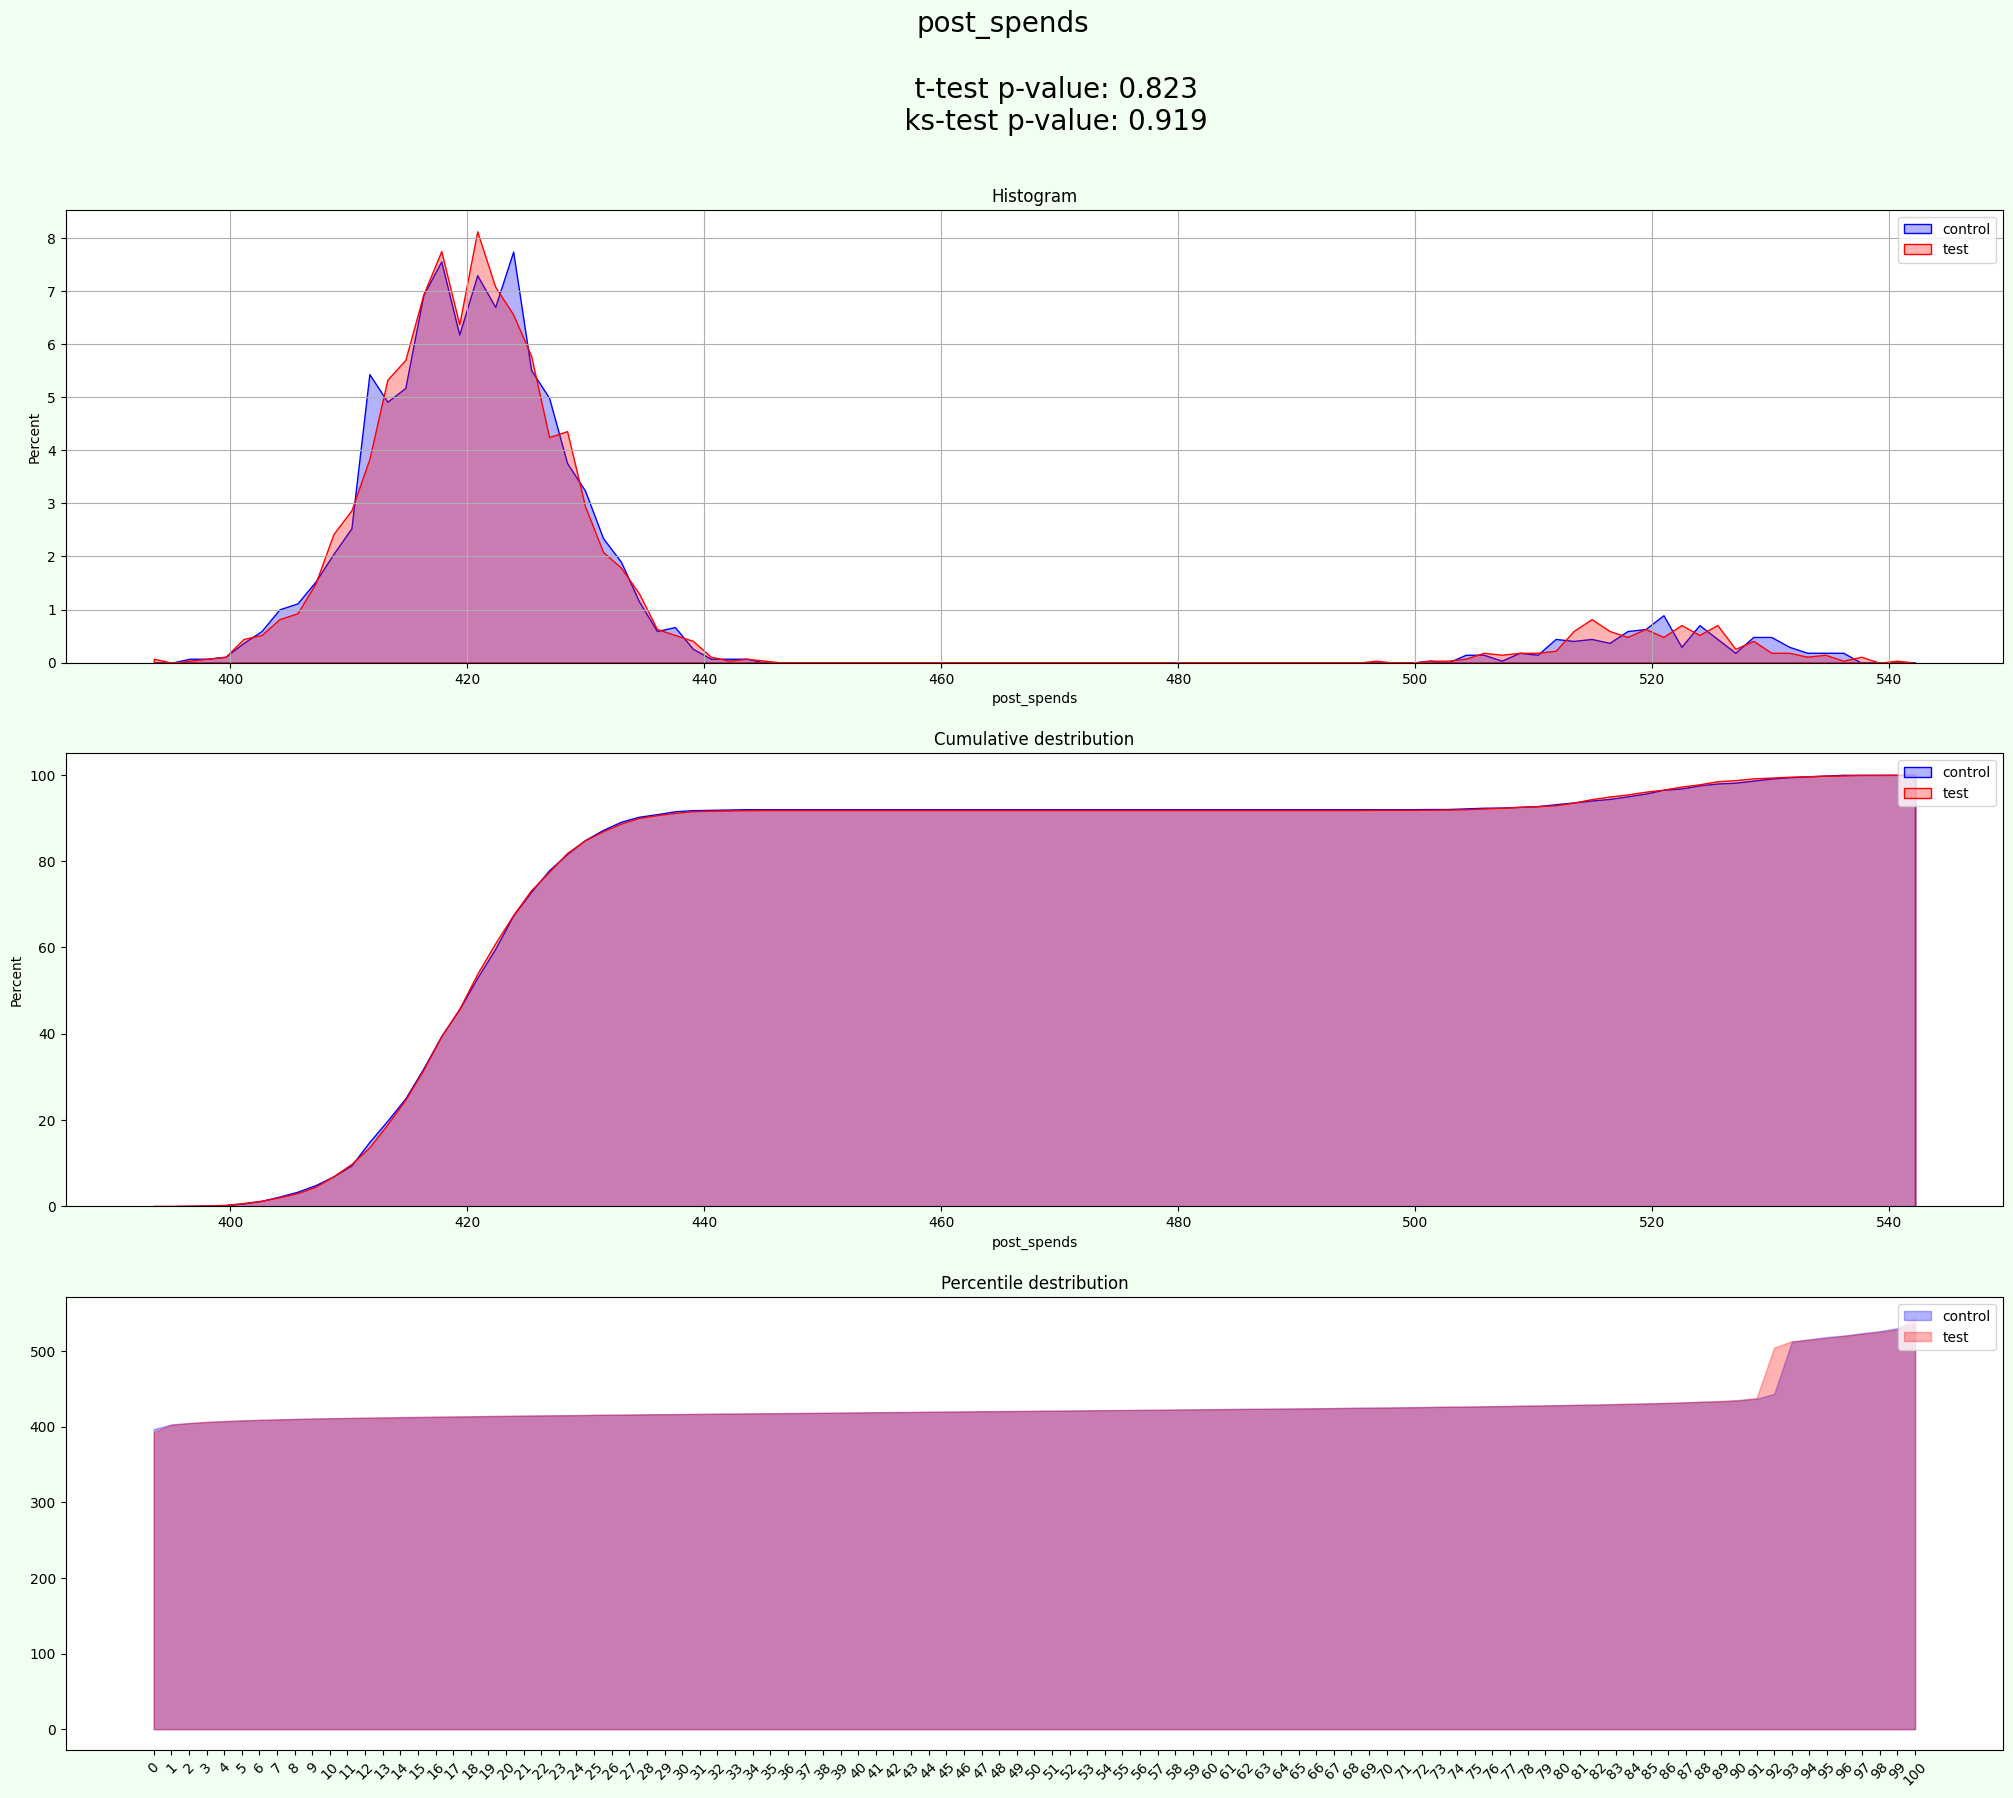

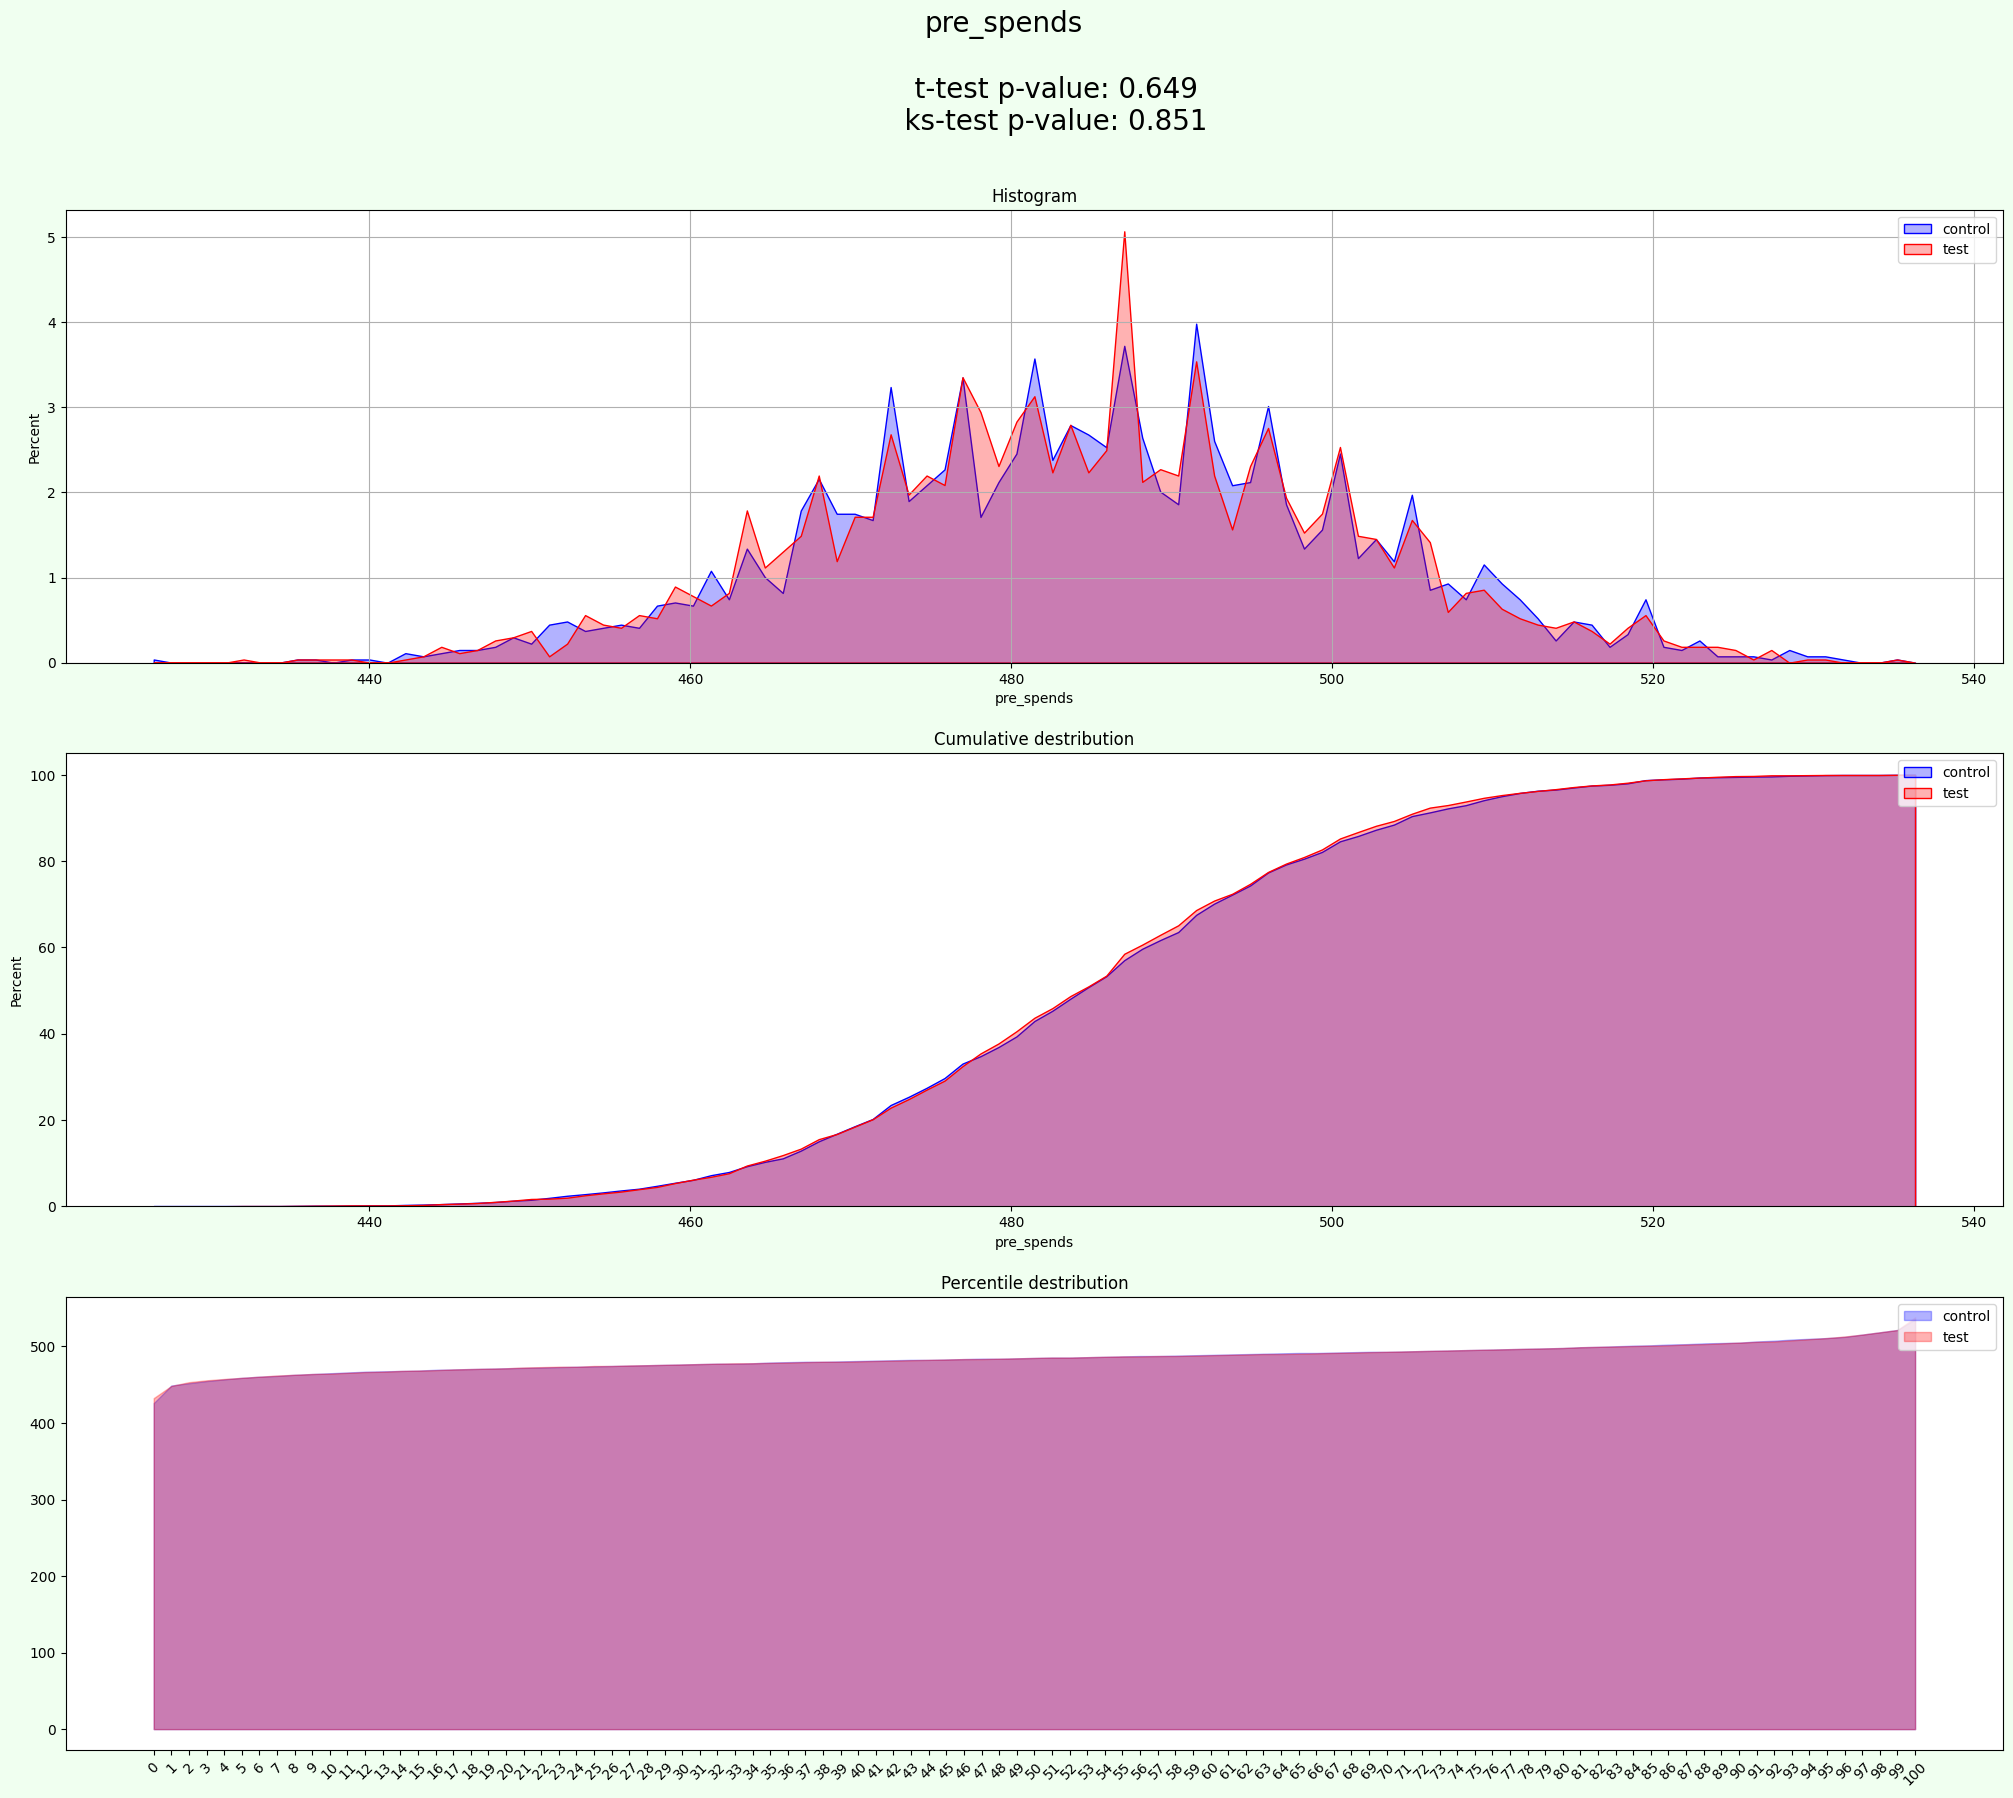

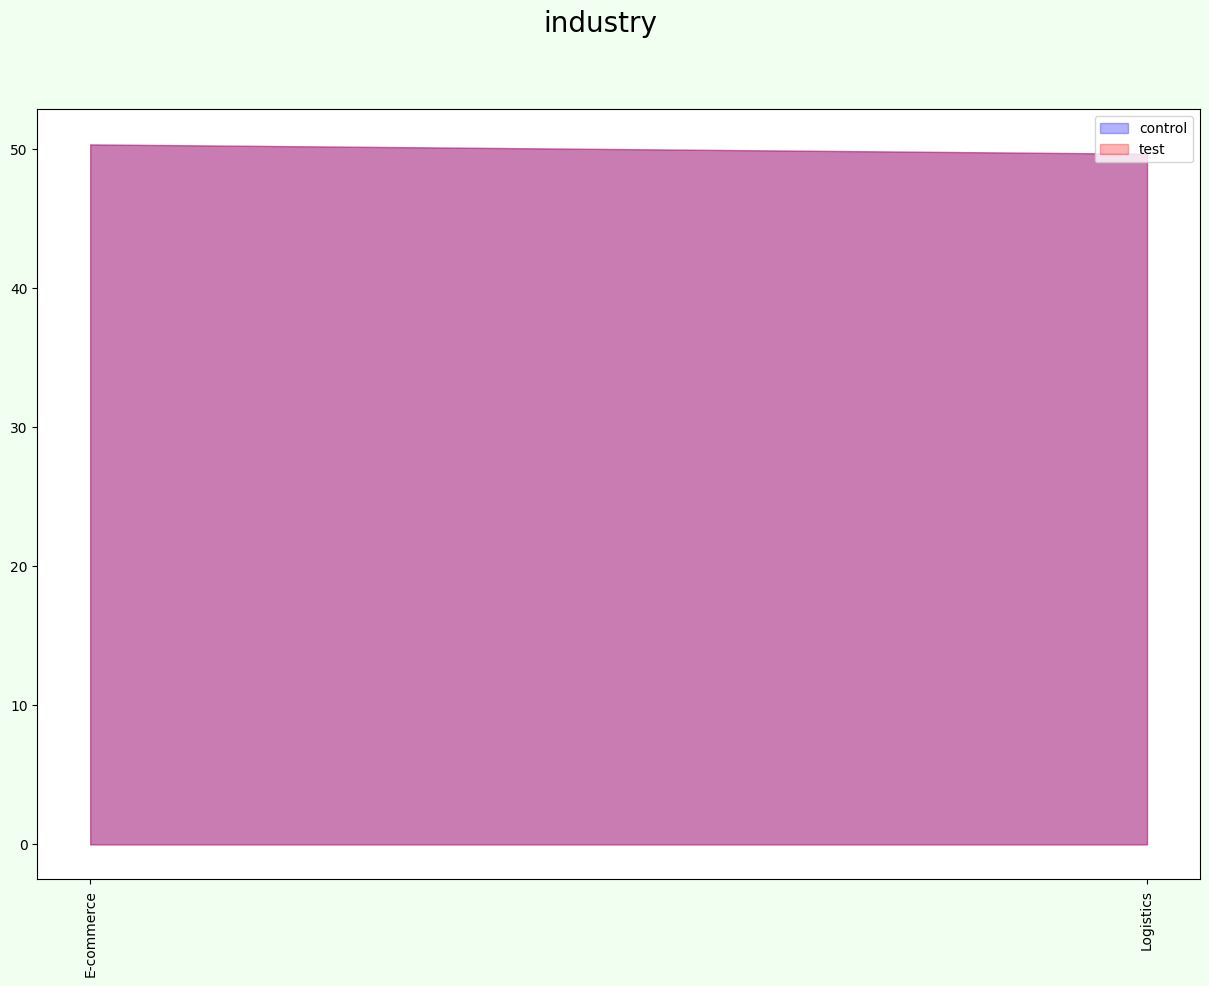

In [19]:
results = experiment.process(data=data, iterations=19)

The result is in the same format as without groups

In this regime groups equally divided on each sample (test and control):

In [20]:
results['split']['industry'].value_counts(normalize=True) * 100

industry
E-commerce   50.34
Logistics    49.66
Name: proportion, dtype: float64

In [21]:
results['split'].groupby(['industry', 'group'])[['user_id']].count()

user_id
industry   group           
E-commerce control     1352
           test        1351
Logistics  control     1334
           test        1333

In [22]:
show_result(results)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,427.44,428.88,1.44,0.34,0.06,0.47,False,False,484.77,...,False,50.02,49.98,2686,2684,0.27,0.60,0.00,0.00,0.49
1,1,427.72,428.60,0.88,0.21,0.25,0.89,False,False,485.00,...,False,50.02,49.98,2686,2684,0.49,0.86,0.00,0.00,0.73
2,2,427.48,428.85,1.37,0.32,0.08,0.39,False,False,484.54,...,False,50.02,49.98,2686,2684,0.08,0.31,0.00,0.00,0.23
3,3,428.08,428.25,0.17,0.04,0.82,0.92,False,False,485.02,...,False,50.02,49.98,2686,2684,0.74,0.88,0.00,0.00,0.84
4,4,428.02,428.30,0.28,0.07,0.72,0.94,False,False,484.84,...,False,50.02,49.98,2686,2684,0.71,0.84,0.00,0.00,0.79
5,5,428.08,428.24,0.16,0.04,0.84,0.88,False,False,484.57,...,True,50.02,49.98,2686,2684,0.47,0.45,0.00,50.00,0.46
6,6,427.98,428.34,0.36,0.08,0.64,0.09,False,False,484.68,...,False,50.02,49.98,2686,2684,0.45,0.25,0.00,0.00,0.32
7,7,427.35,428.98,1.63,0.38,0.04,0.28,True,False,484.99,...,False,50.02,49.98,2686,2684,0.39,0.26,50.00,0.00,0.30
8,8,428.55,427.78,-0.77,-0.18,0.32,0.09,False,False,484.90,...,False,50.02,49.98,2686,2684,0.61,0.32,0.00,0.00,0.42
9,9,427.87,428.46,0.59,0.14,0.45,0.28,False,False,485.10,...,False,50.02,49.98,2686,2684,0.43,0.59,0.00,0.00,0.54



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.05,1.00,1.00
pre_spends,0.00,0.05,0.00,1.00
mean,0.03,0.05,0.50,1.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,13,0,0,508.50,424.22,36.00,F,E-commerce,test
1,15,0,0,464.50,421.67,38.00,F,E-commerce,test
2,21,0,0,489.00,433.11,30.00,M,E-commerce,test
3,25,0,0,499.50,425.78,56.00,M,Logistics,test
4,27,0,0,468.50,432.22,NaN,M,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9985,0,0,484.00,411.33,NaN,F,E-commerce,control
5366,9986,0,0,494.00,432.11,54.00,NaN,Logistics,control
5367,9992,0,0,491.50,424.00,44.00,M,E-commerce,control
5368,9994,0,0,486.00,423.78,27.00,F,Logistics,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.08,428.25,0.17,0.04,0.82,0.92,False,False
pre_spends,485.02,484.83,-0.20,-0.04,0.65,0.85,False,False



split_stat


control %              50.02
test %                 49.98
control size            2686
test size               2684
t-test mean p-value     0.74
ks-test mean p-value    0.88
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.84
Name: 3, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK


### 2.4 AA with optimize group 

_If you have many columns for grouping and don't know which colun or columns will make best result, you can use parametr `optimize_group=True`.
AA-Test will choose optimal number and names of group columns._

You can use `columns_labeling` to automatically name columns as target and group.

In [23]:
experiment.columns_labeling(data)

{'target_field': ['treat', 'pre_spends', 'post_spends', 'age'],
 'group_col': ['gender', 'industry']}

Group optimization:   0%|          | 0/3 [00:00<?, ?it/s]

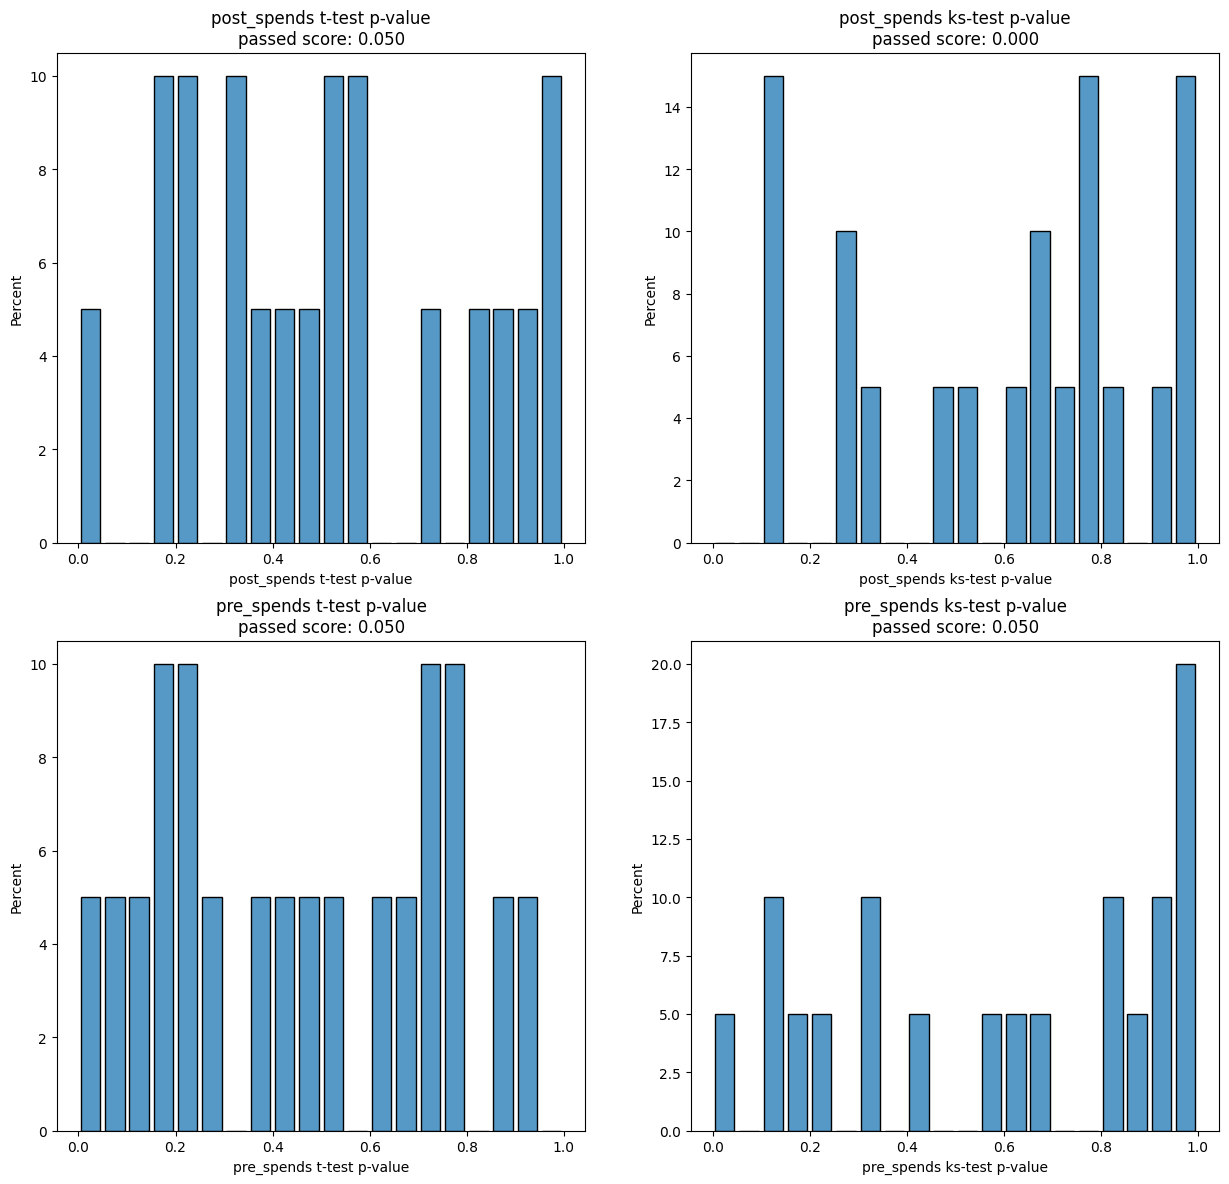

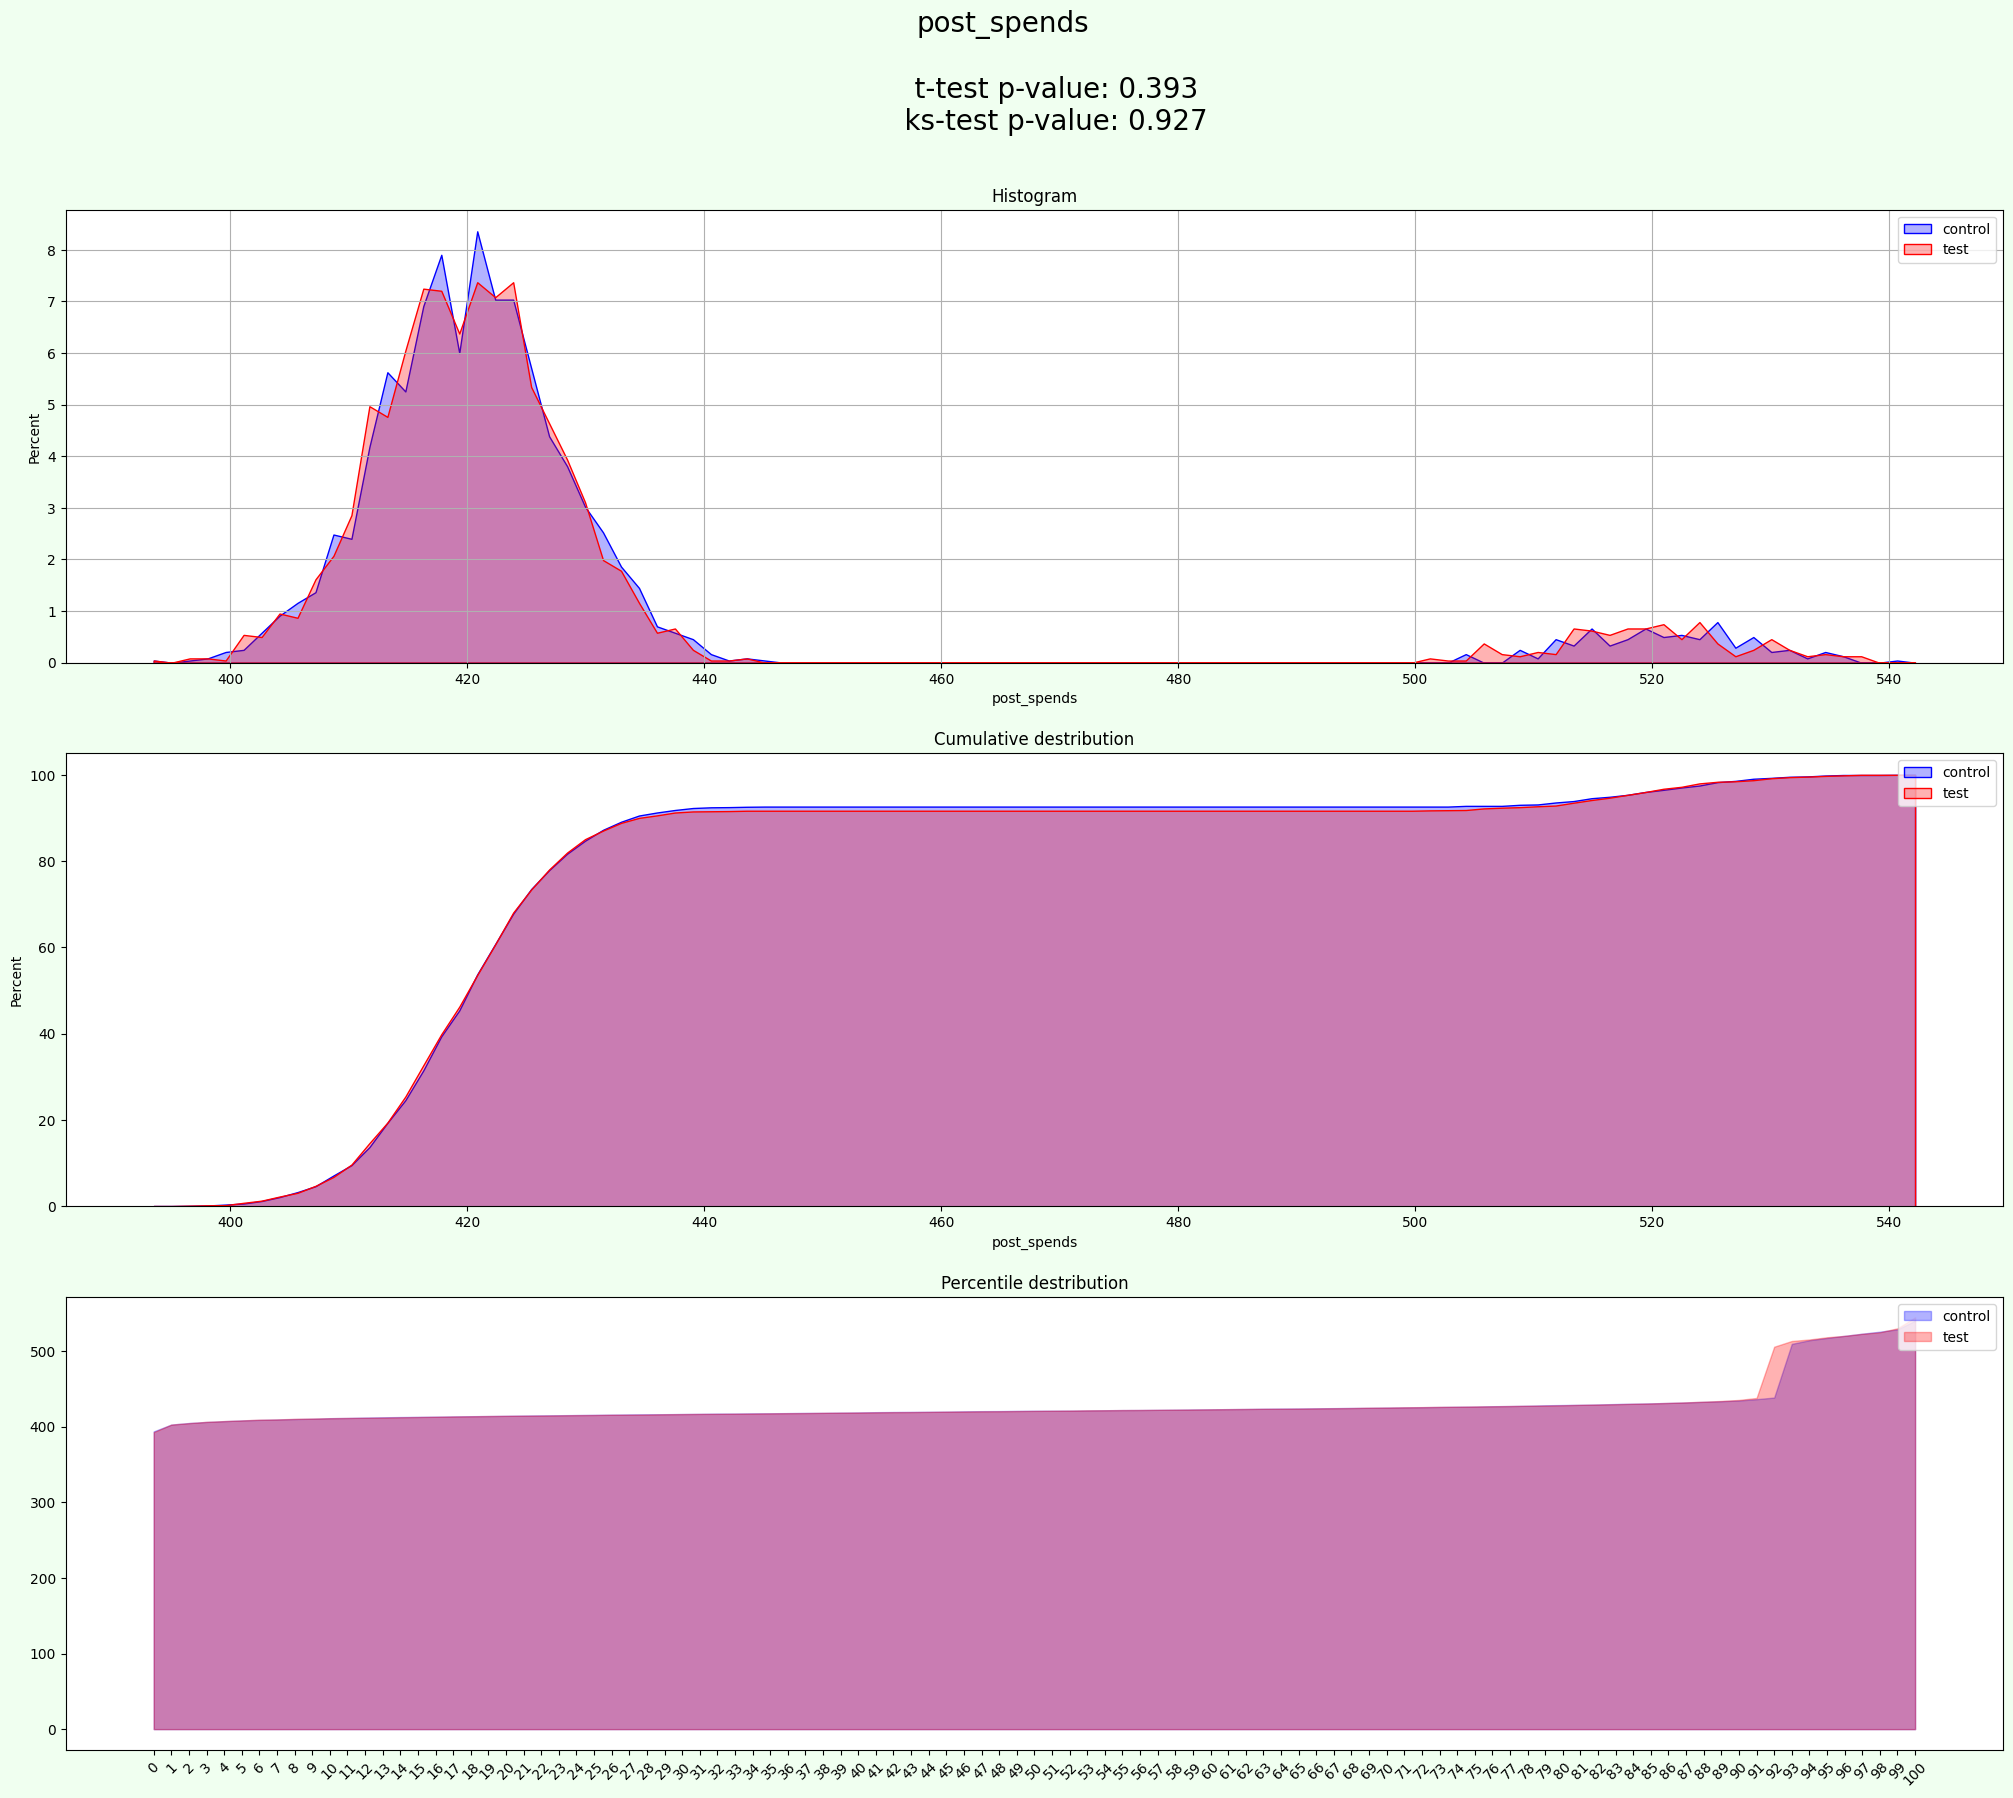

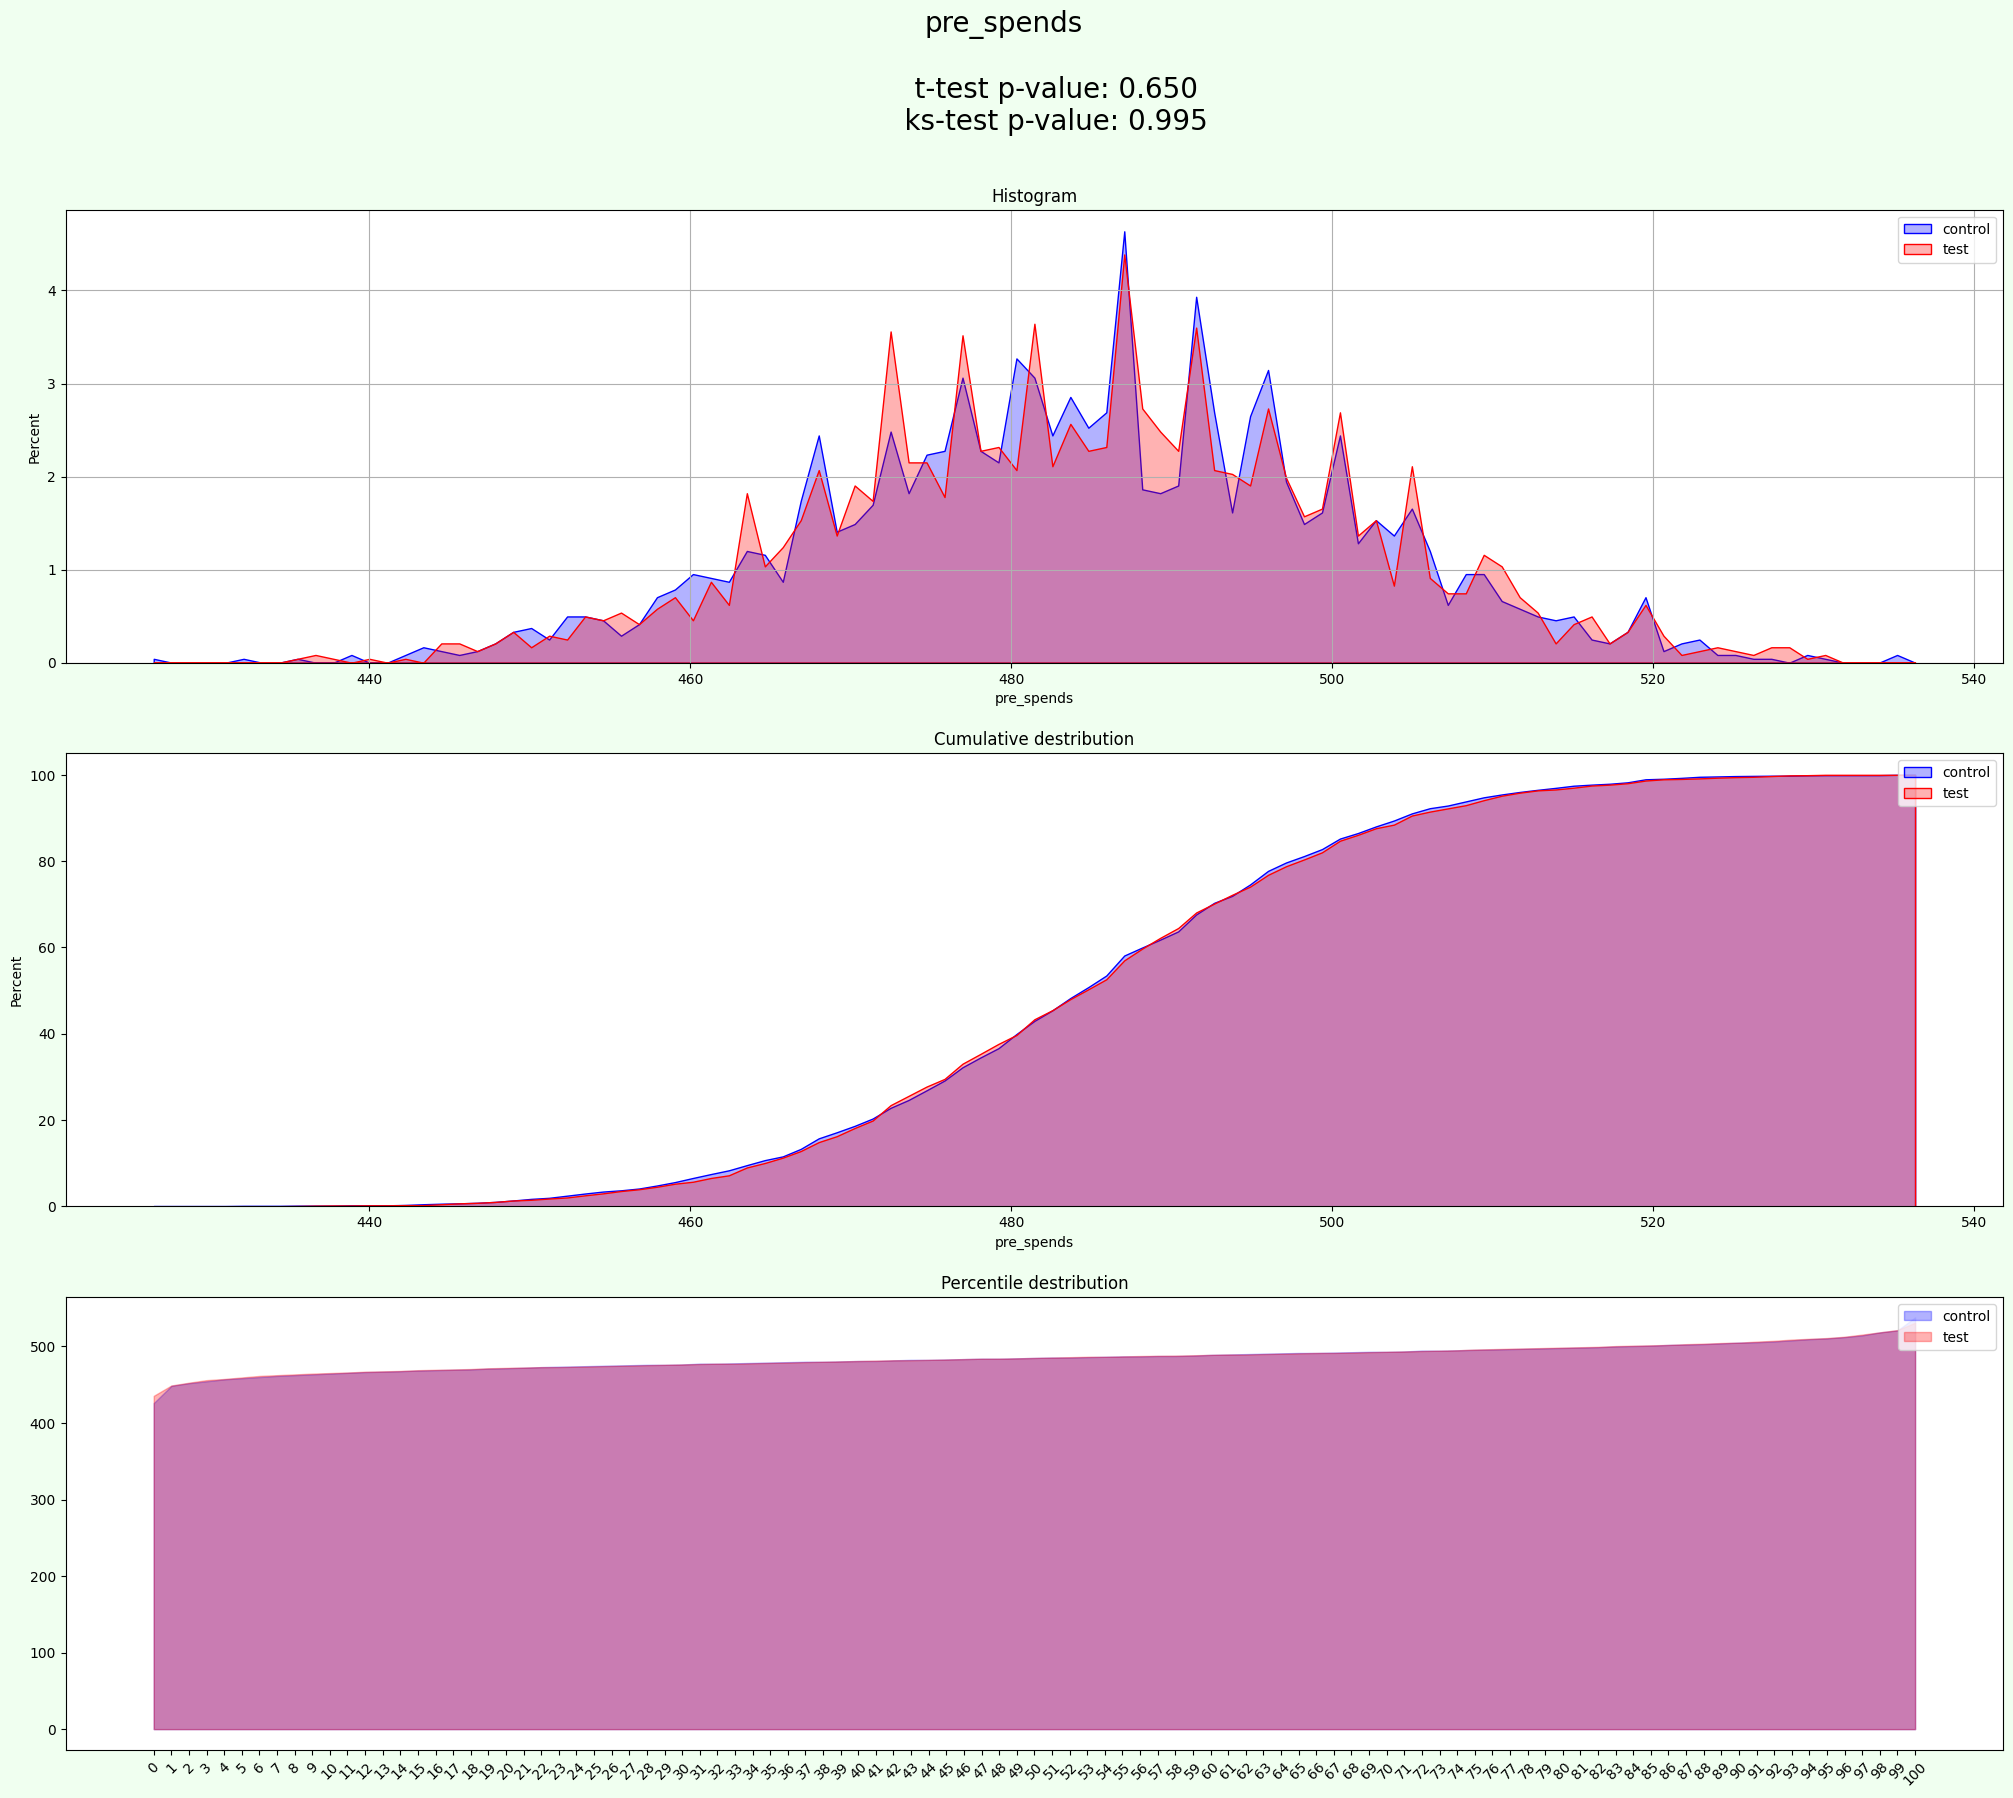

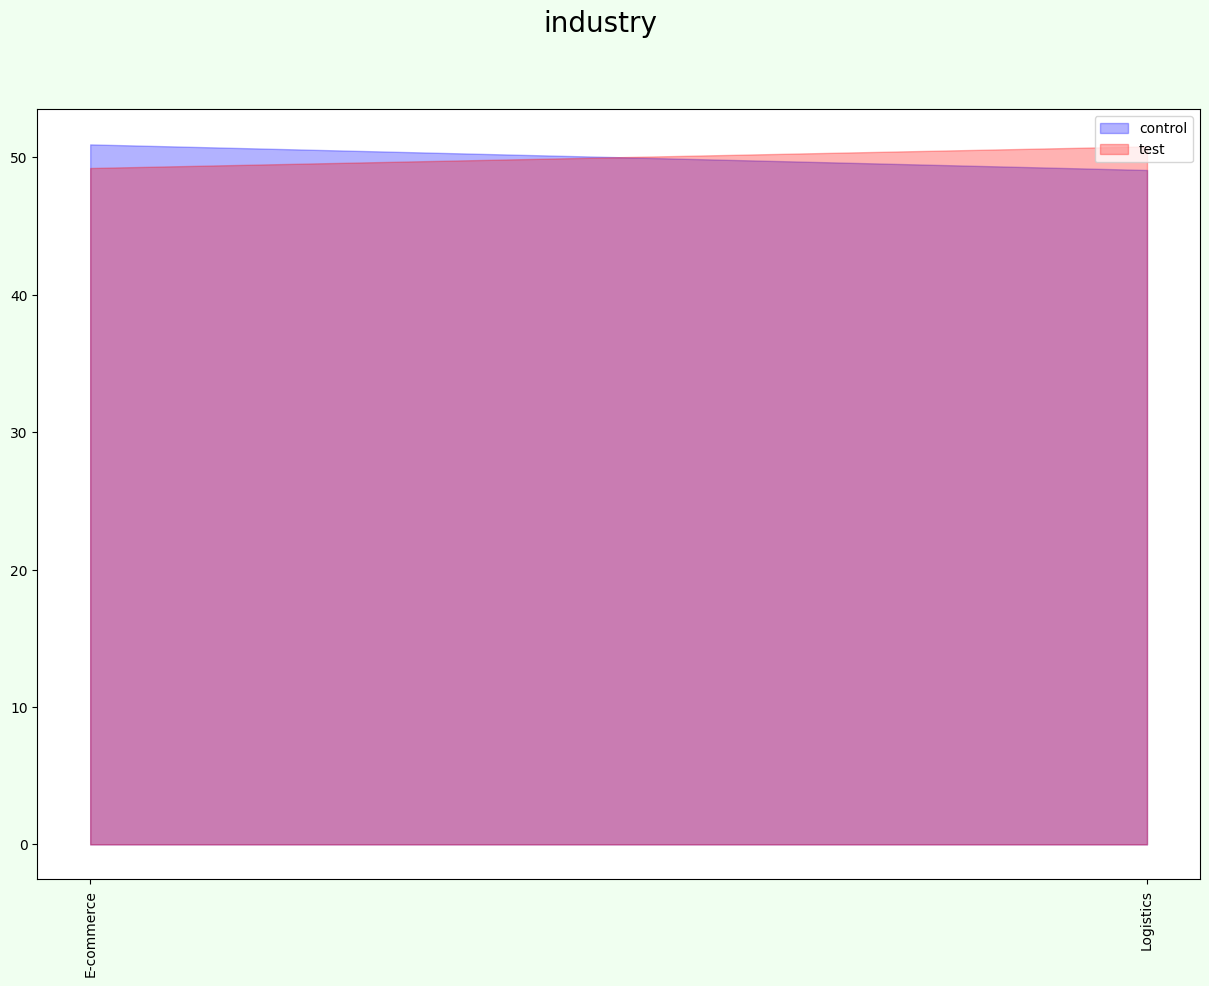

In [24]:
results = experiment.process(data=data, optimize_groups=True, iterations=20)

In [25]:
experiment.group_cols

['industry']

In [26]:
show_result(results)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,427.99,427.88,-0.11,-0.03,0.89,0.30,False,False,485.03,...,False,45.01,44.99,2417,2416,0.81,0.56,0.00,0.00,0.64
1,1,427.65,428.22,0.57,0.13,0.48,0.72,False,False,484.69,...,False,45.01,44.99,2417,2416,0.37,0.44,0.00,0.00,0.42
2,2,427.79,428.09,0.30,0.07,0.71,1.00,False,False,484.65,...,False,45.01,44.99,2417,2416,0.45,0.55,0.00,0.00,0.52
3,3,427.91,427.96,0.06,0.01,0.94,0.29,False,False,484.99,...,False,45.01,44.99,2417,2416,0.92,0.63,0.00,0.00,0.72
4,4,427.53,428.34,0.81,0.19,0.32,0.67,False,False,484.89,...,False,45.01,44.99,2417,2416,0.55,0.68,0.00,0.00,0.64
5,5,428.50,427.38,-1.12,-0.26,0.17,0.77,False,False,485.03,...,False,45.01,44.99,2417,2416,0.46,0.88,0.00,0.00,0.74
6,6,427.67,428.20,0.53,0.12,0.51,0.96,False,False,484.72,...,False,45.01,44.99,2417,2416,0.40,0.69,0.00,0.00,0.60
7,7,427.62,428.25,0.63,0.15,0.44,0.75,False,False,485.37,...,False,45.01,44.99,2417,2416,0.25,0.43,0.00,0.00,0.37
8,8,427.67,428.20,0.53,0.12,0.51,0.83,False,False,484.63,...,False,45.01,44.99,2417,2416,0.33,0.57,0.00,0.00,0.49
9,9,428.16,427.71,-0.45,-0.11,0.58,0.26,False,False,484.98,...,False,45.01,44.99,2417,2416,0.75,0.54,0.00,0.00,0.61



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.00,1.00,0.00
pre_spends,0.05,0.05,1.00,1.00
mean,0.05,0.03,1.00,0.50



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,12,0,0,472.00,423.78,43.00,M,E-commerce,test
2,13,0,0,508.50,424.22,36.00,F,E-commerce,test
3,14,0,0,497.00,421.78,26.00,M,Logistics,test
4,25,0,0,499.50,425.78,56.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
4828,9987,0,0,467.00,431.56,48.00,M,Logistics,control
4829,9988,0,0,501.50,423.22,55.00,F,Logistics,control
4830,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
4831,9991,0,0,482.50,421.89,23.00,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,427.59,428.28,0.69,0.16,0.39,0.93,False,False
pre_spends,484.85,485.06,0.21,0.04,0.65,0.99,False,False



split_stat


control %              45.01
test %                 44.99
control size            2417
test size               2416
t-test mean p-value     0.52
ks-test mean p-value    0.96
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.81
Name: 15, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK


### 2.5 AA test with quantization 

_If you want make one column as parameter for quantization, you may use `quant_field`._

In [27]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'
quant_field = 'gender'

In [28]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols, quant_field=quant_field)

  0%|          | 0/20 [00:00<?, ?it/s]

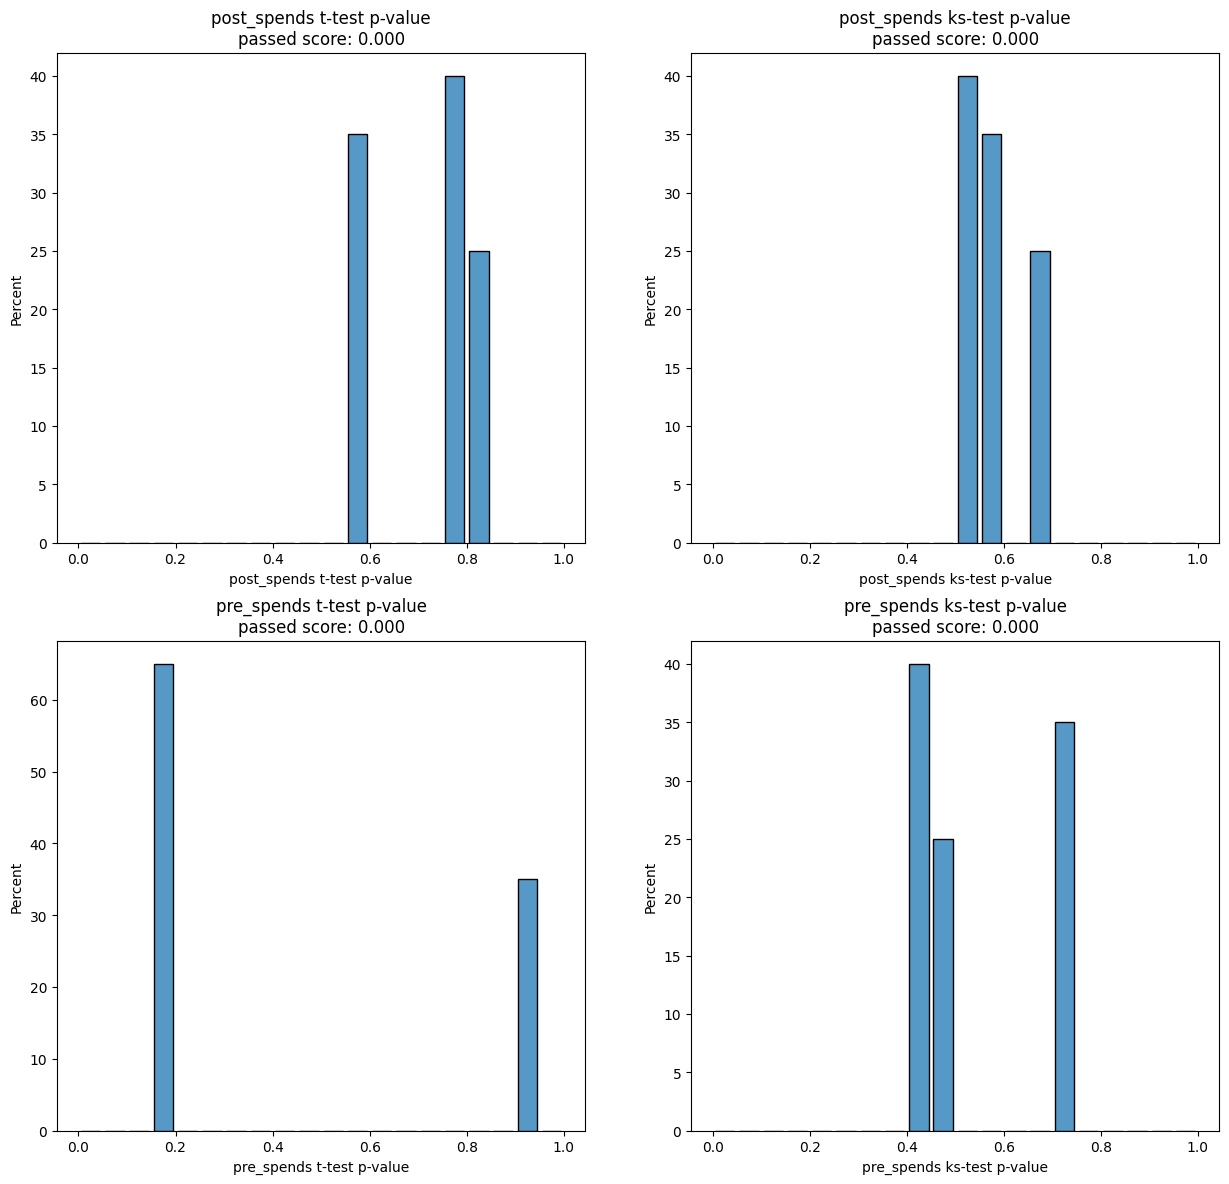

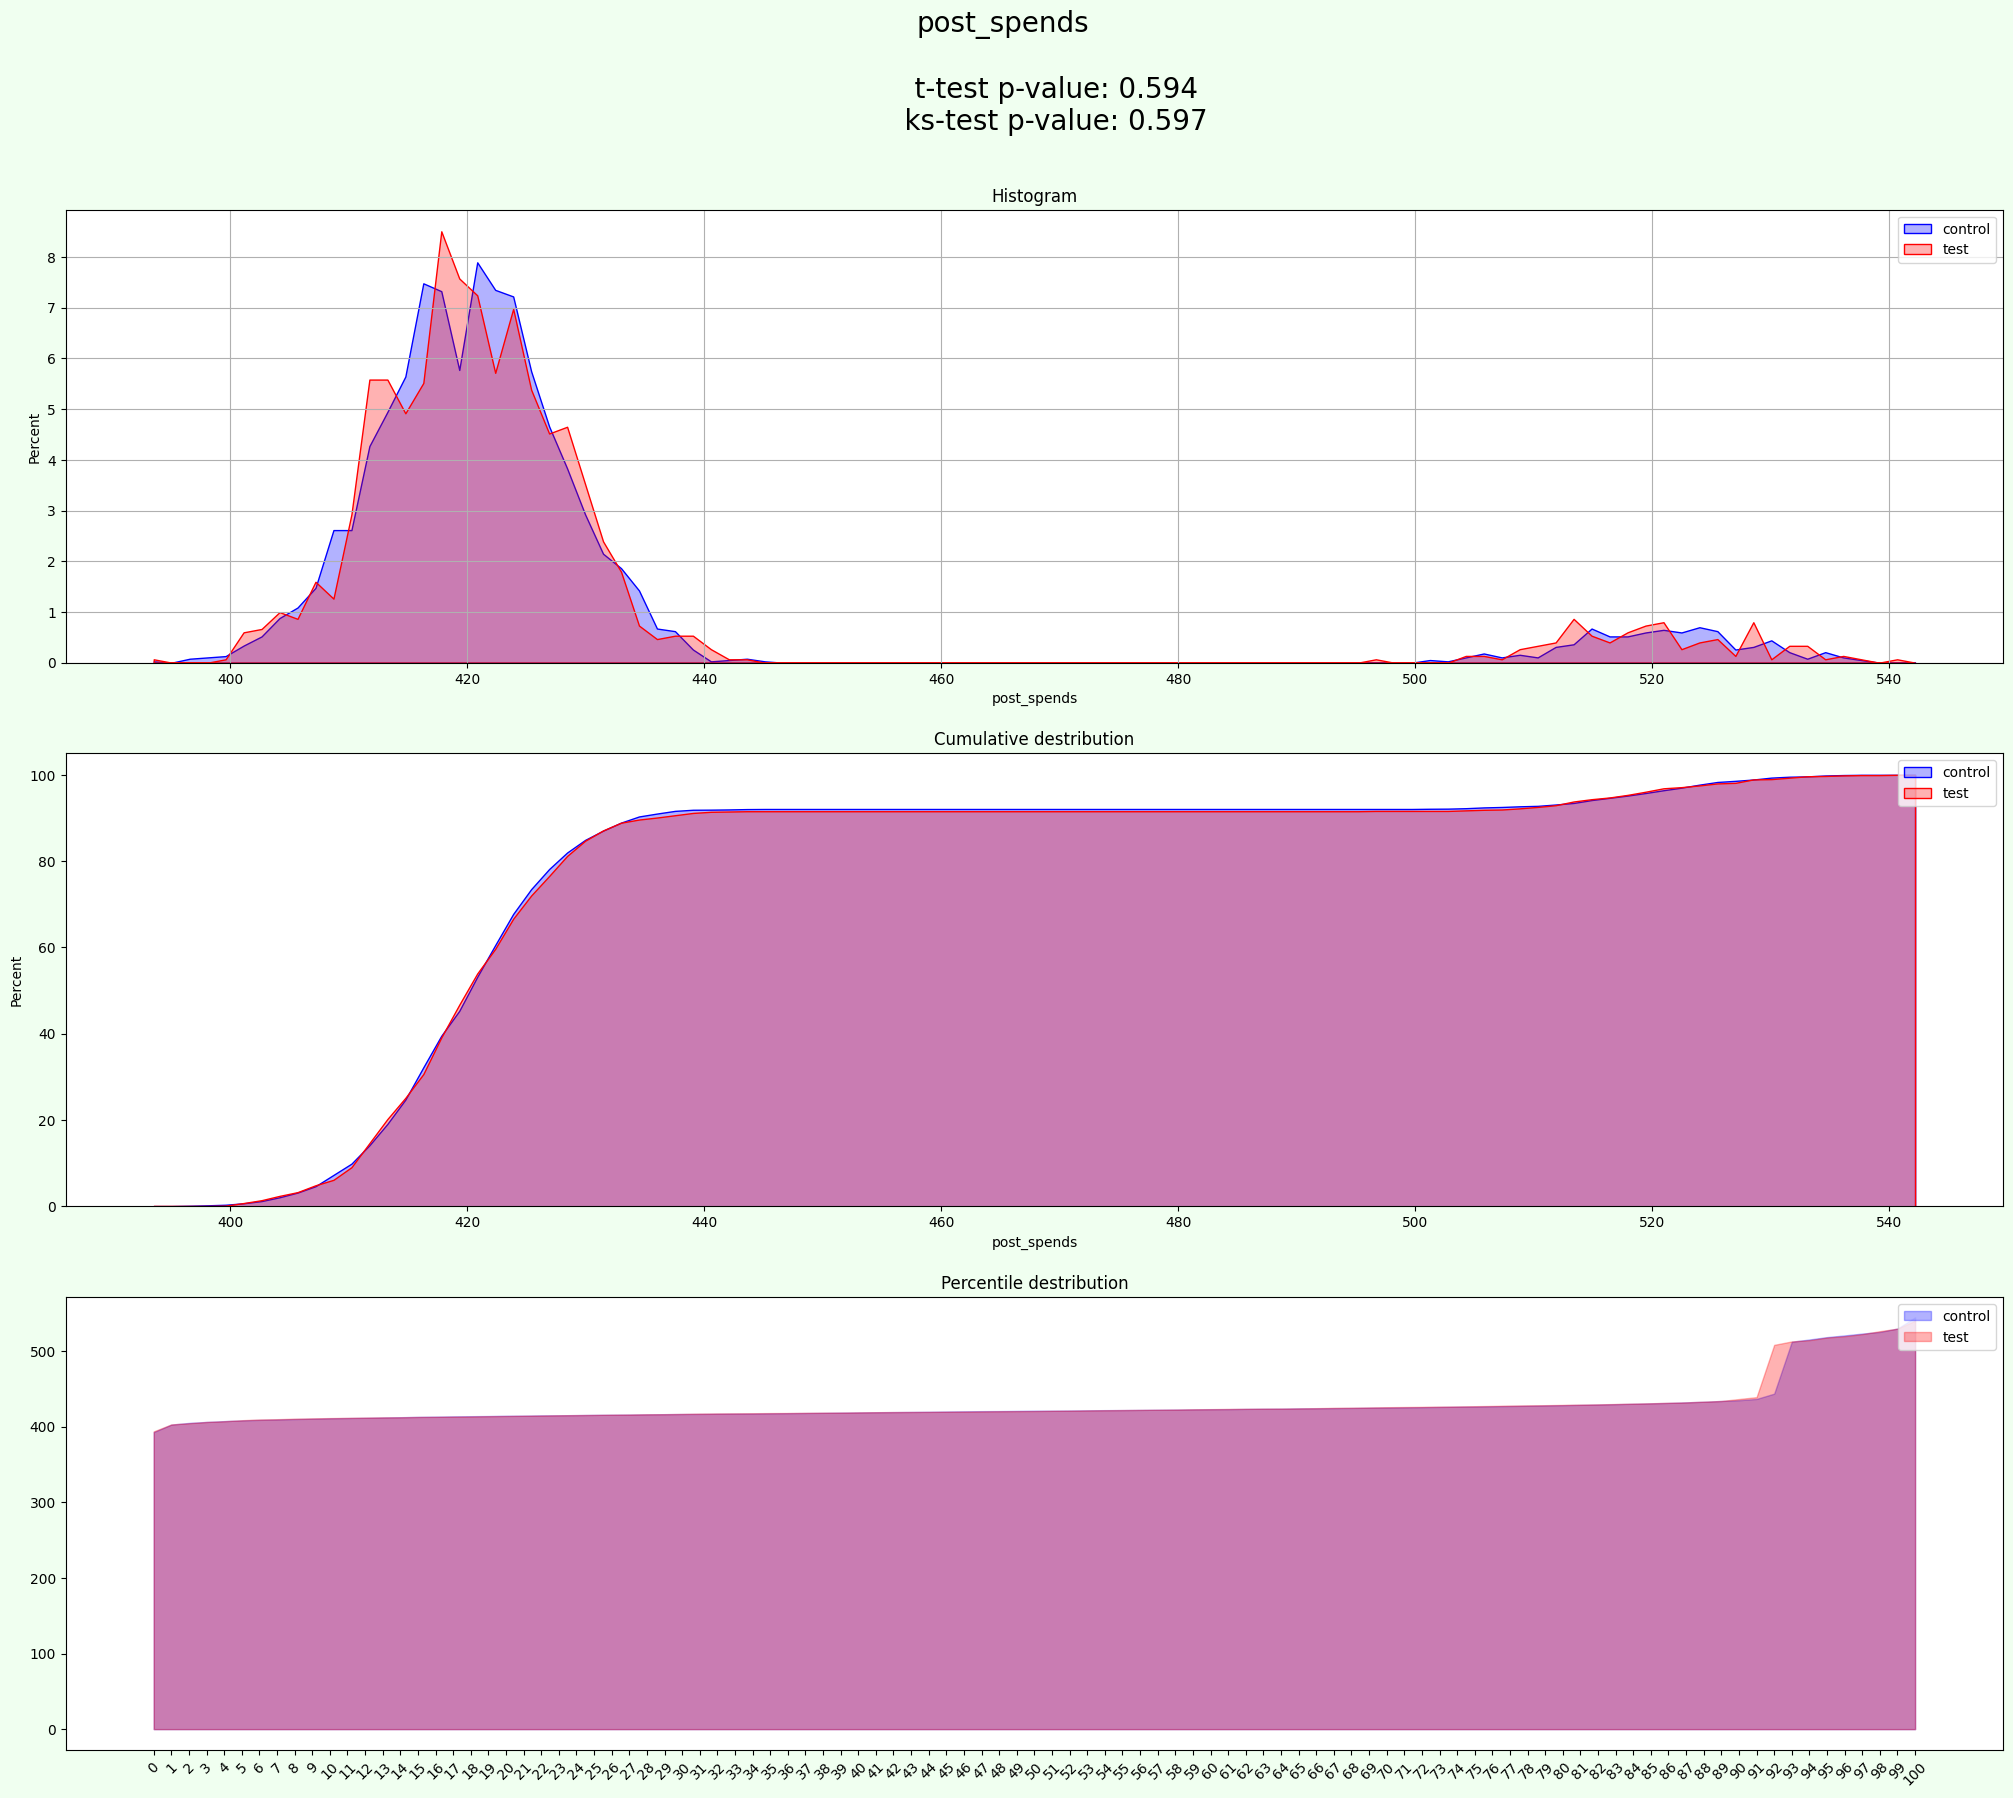

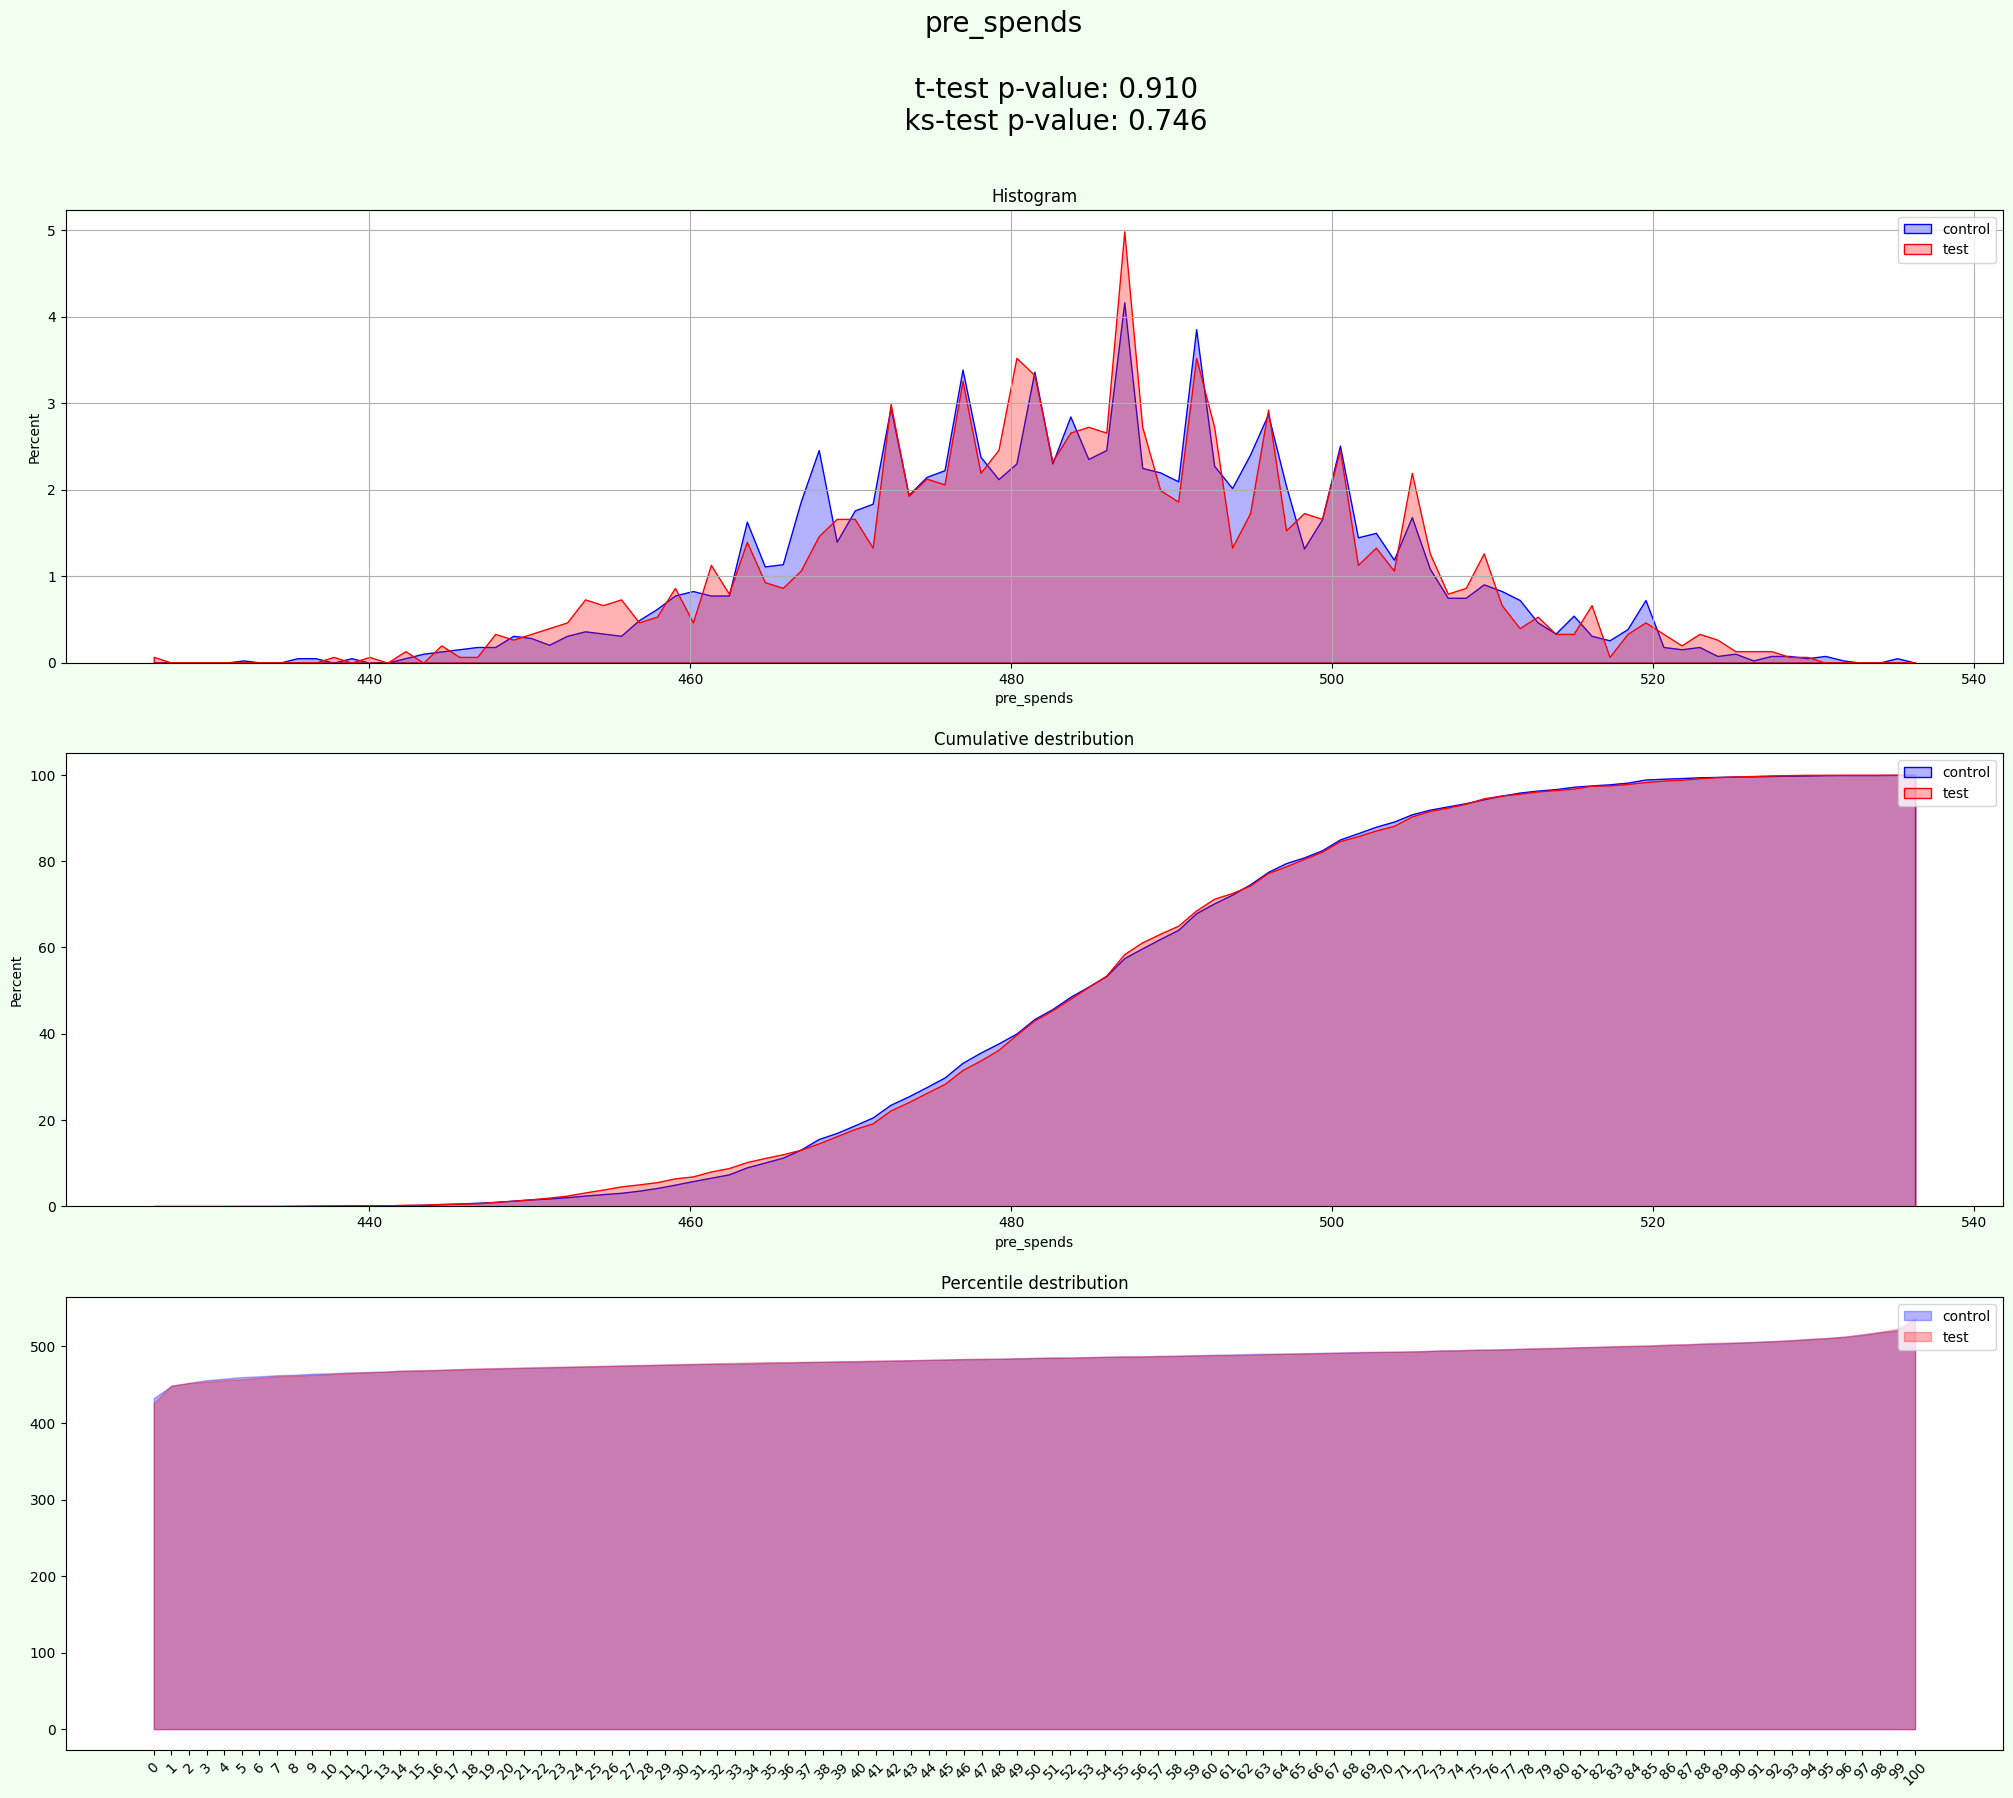

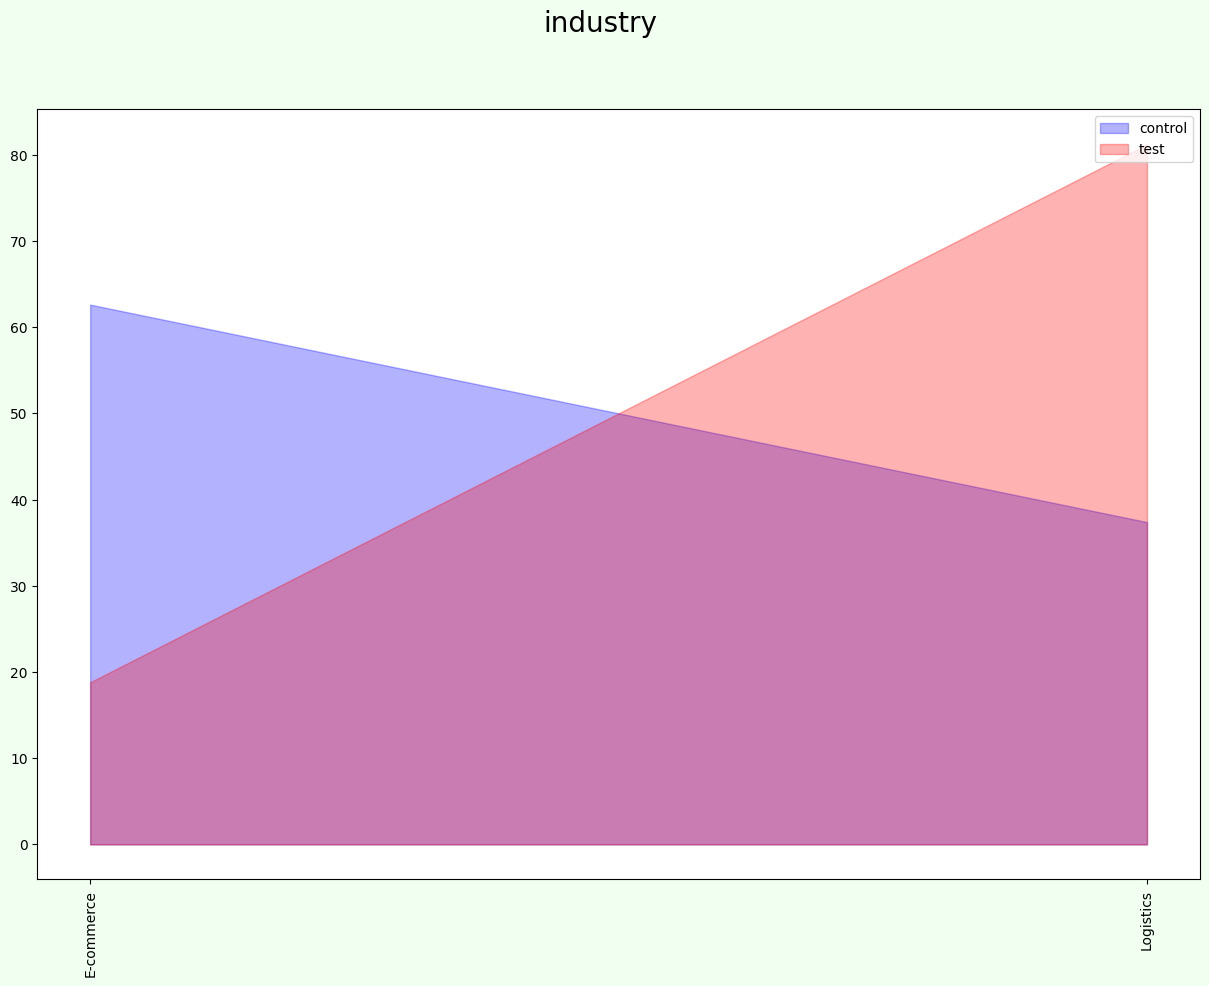

In [29]:
result = experiment.process(data=data, iterations=20)

In [30]:
result['split'].groupby(['gender', 'industry', 'group'])['user_id'].count()


gender  industry    group  
F       E-commerce  control    1255
        Logistics   test       1222
M       E-commerce  control    1165
        Logistics   control    1191
Name: user_id, dtype: int64

In [31]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,428.03,428.49,0.46,0.11,0.59,0.60,False,False,484.91,...,False,71.97,28.03,3865,1505,0.75,0.67,0.00,0.00,0.70
1,1,428.24,427.96,-0.28,-0.06,0.75,0.54,False,False,484.75,...,False,73.58,26.42,3951,1419,0.46,0.47,0.00,0.00,0.47
2,2,428.03,428.49,0.46,0.11,0.59,0.60,False,False,484.91,...,False,71.97,28.03,3865,1505,0.75,0.67,0.00,0.00,0.70
3,3,428.23,428.08,-0.16,-0.04,0.84,0.68,False,False,485.19,...,False,54.45,45.55,2924,2446,0.51,0.58,0.00,0.00,0.56
4,4,428.23,428.08,-0.16,-0.04,0.84,0.68,False,False,485.19,...,False,54.45,45.55,2924,2446,0.51,0.58,0.00,0.00,0.56
5,5,428.24,427.96,-0.28,-0.06,0.75,0.54,False,False,484.75,...,False,73.58,26.42,3951,1419,0.46,0.47,0.00,0.00,0.47
6,6,428.24,427.96,-0.28,-0.06,0.75,0.54,False,False,484.75,...,False,73.58,26.42,3951,1419,0.46,0.47,0.00,0.00,0.47
7,7,428.03,428.49,0.46,0.11,0.59,0.60,False,False,484.91,...,False,71.97,28.03,3865,1505,0.75,0.67,0.00,0.00,0.70
8,8,428.03,428.49,0.46,0.11,0.59,0.60,False,False,484.91,...,False,71.97,28.03,3865,1505,0.75,0.67,0.00,0.00,0.70
9,9,428.23,428.08,-0.16,-0.04,0.84,0.68,False,False,485.19,...,False,54.45,45.55,2924,2446,0.51,0.58,0.00,0.00,0.56



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.00,0.00,0.00,0.00
pre_spends,0.00,0.00,0.00,0.00
mean,0.00,0.00,0.00,0.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,28,3,1,479.50,527.89,20.00,NaN,E-commerce,test
1,31,0,0,505.00,427.22,54.00,F,Logistics,test
2,36,0,0,456.00,419.22,59.00,F,Logistics,test
3,41,0,0,451.00,426.78,52.00,F,Logistics,test
4,46,0,0,508.50,413.00,60.00,NaN,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5366,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5367,9992,0,0,491.50,424.00,44.00,M,E-commerce,control
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.03,428.49,0.46,0.11,0.59,0.60,False,False
pre_spends,484.91,484.96,0.05,0.01,0.91,0.75,False,False



split_stat


control %              71.97
test %                 28.03
control size            3865
test size               1505
t-test mean p-value     0.75
ks-test mean p-value    0.67
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.70
Name: 0, dtype: object


resume


,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


### 2.6 Unbalanced AA test

_If you want to perform AA test with unbalanced groups, you can use parametr `test_size` to define sizes of test group and control group_

In [32]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [33]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

  0%|          | 0/20 [00:00<?, ?it/s]

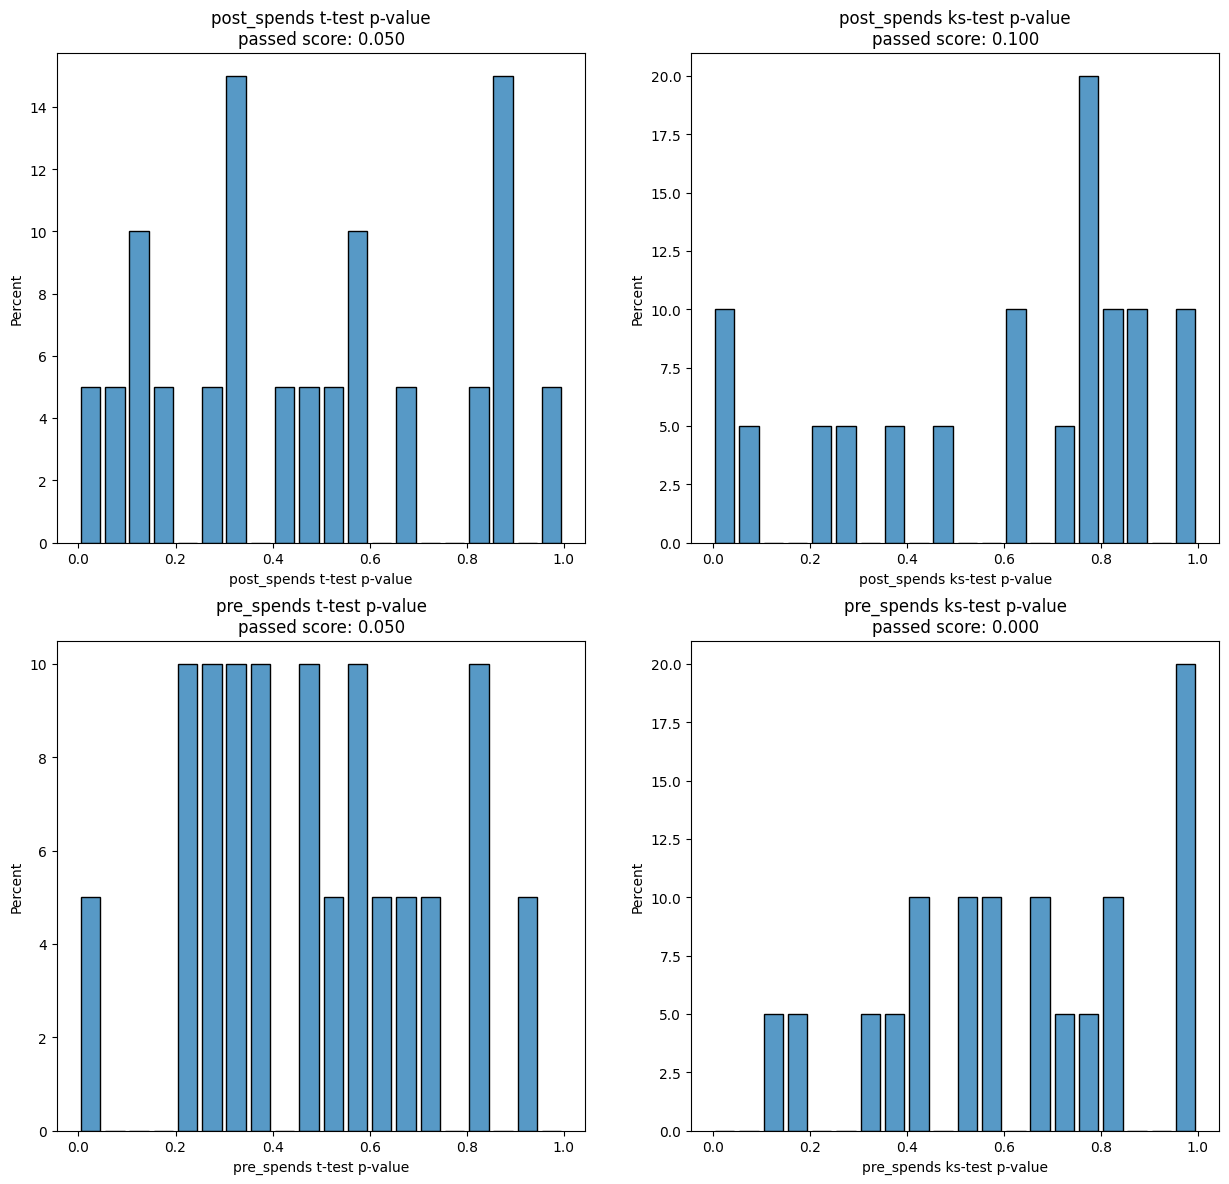

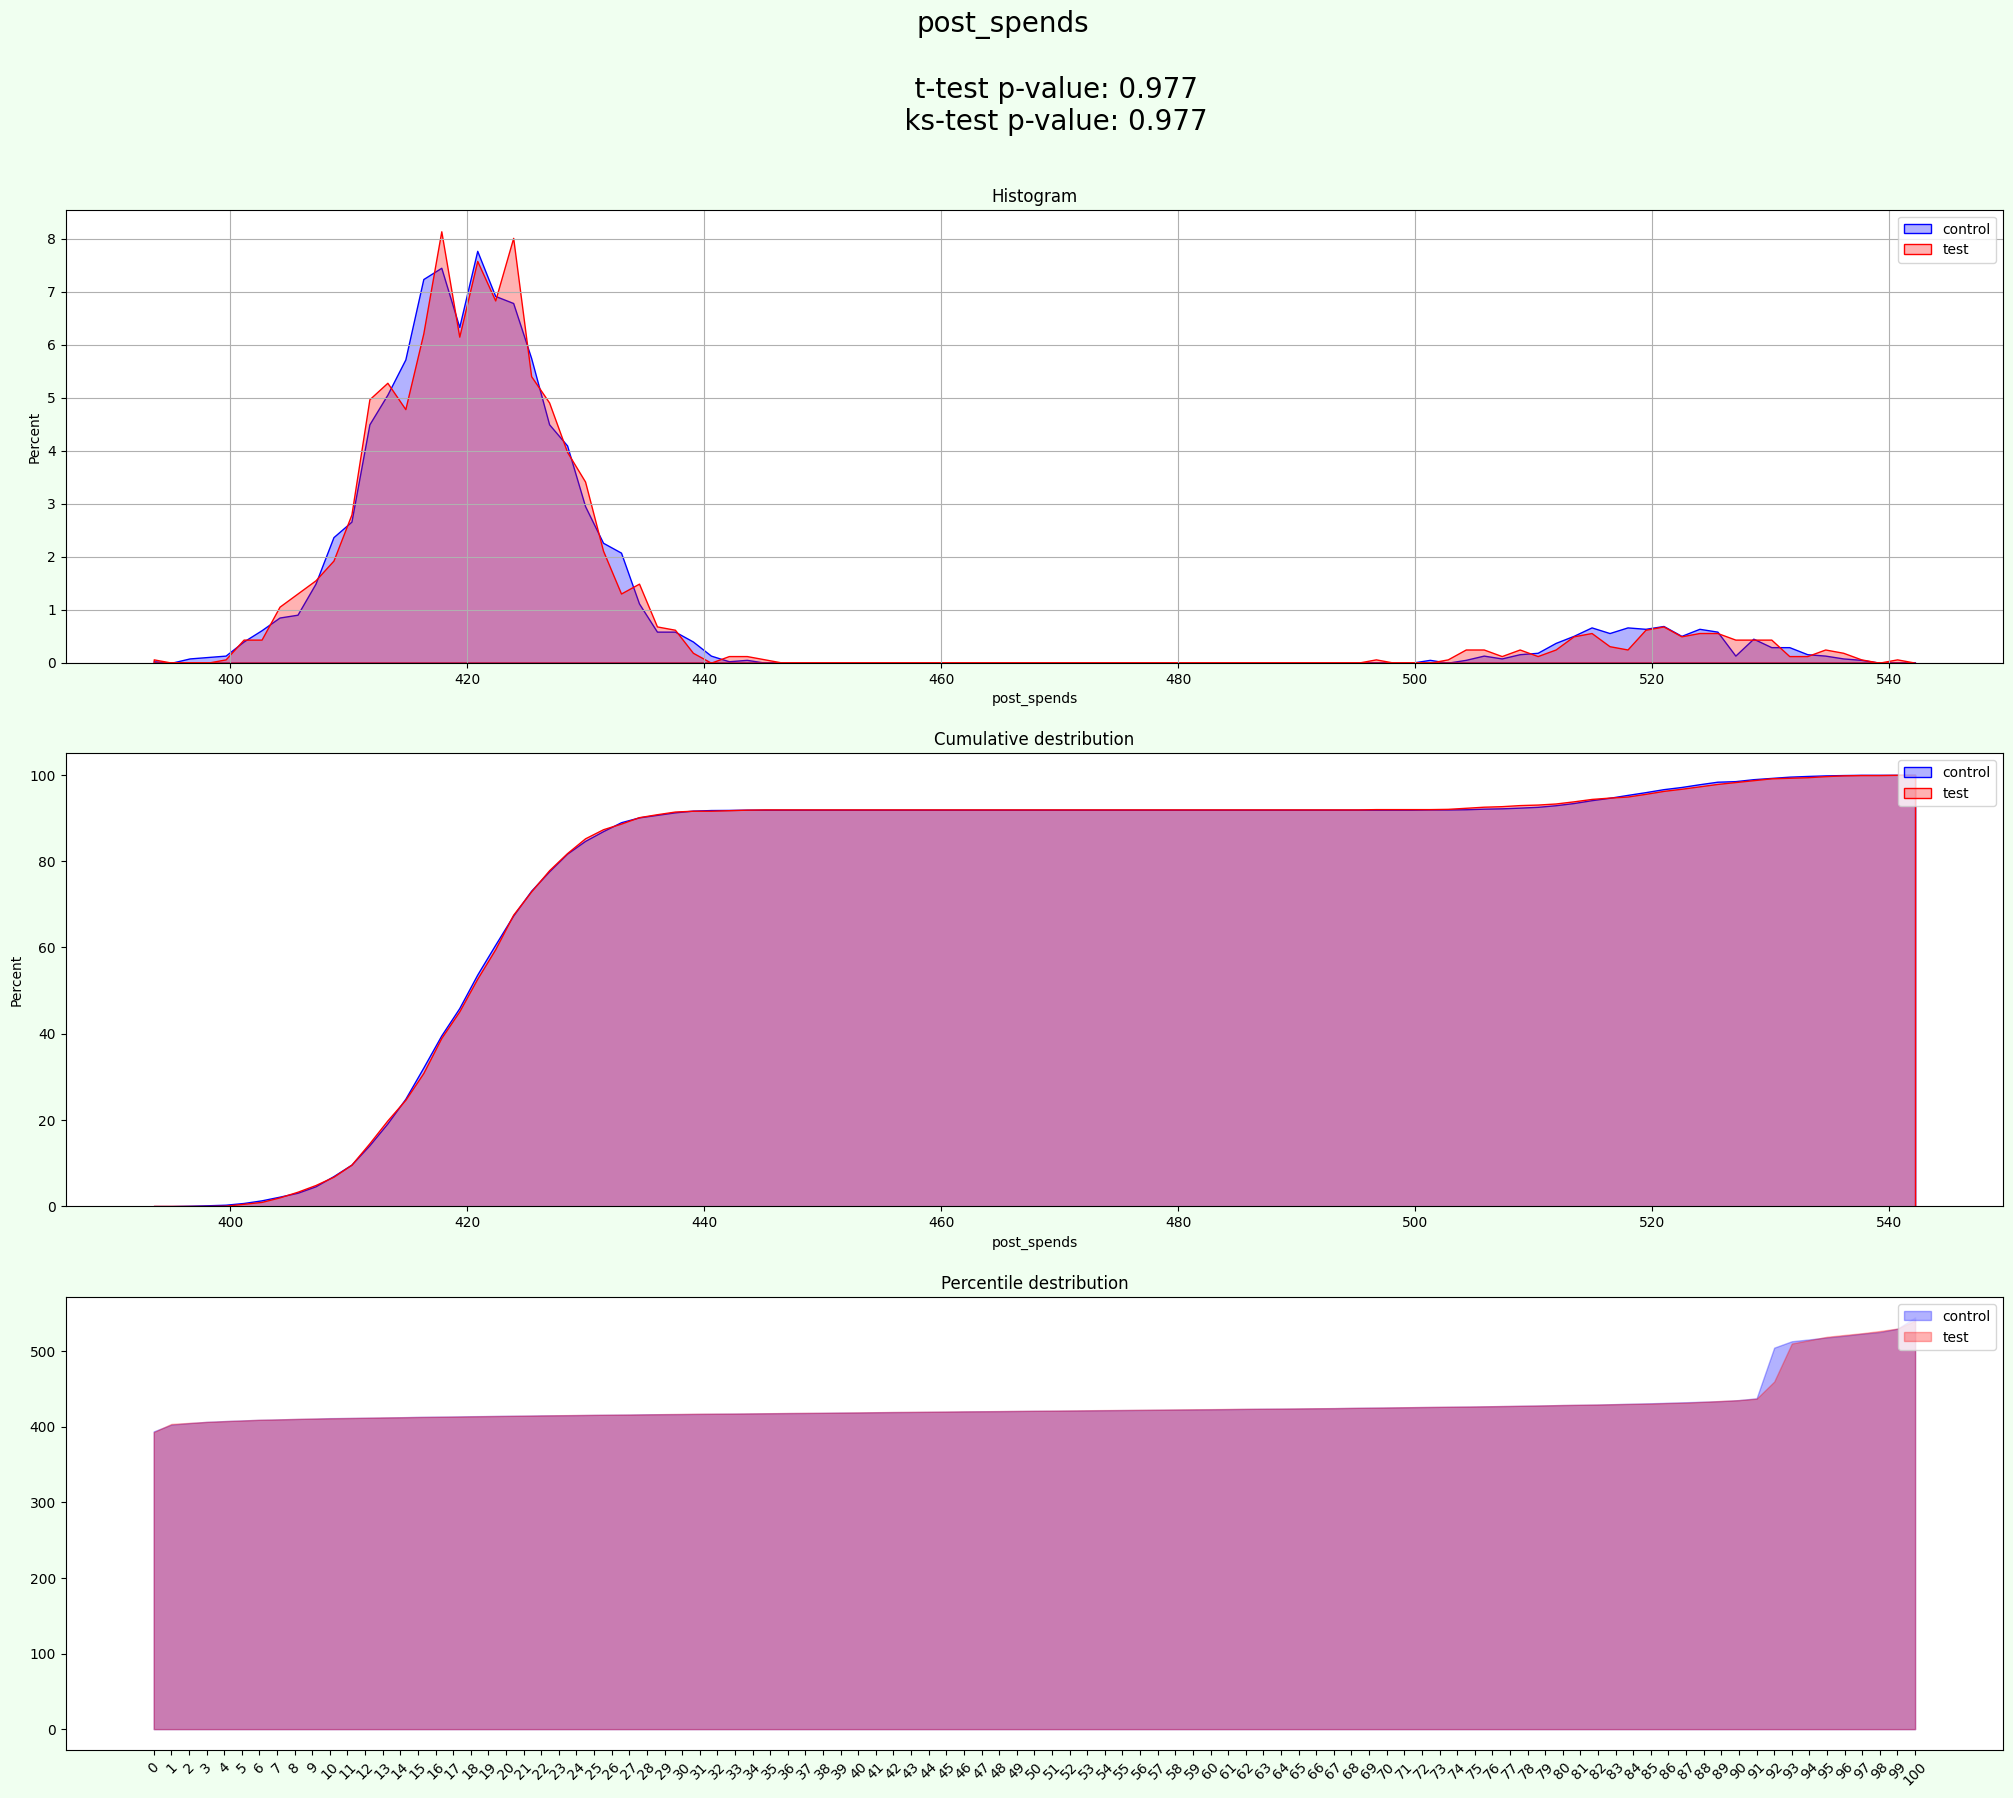

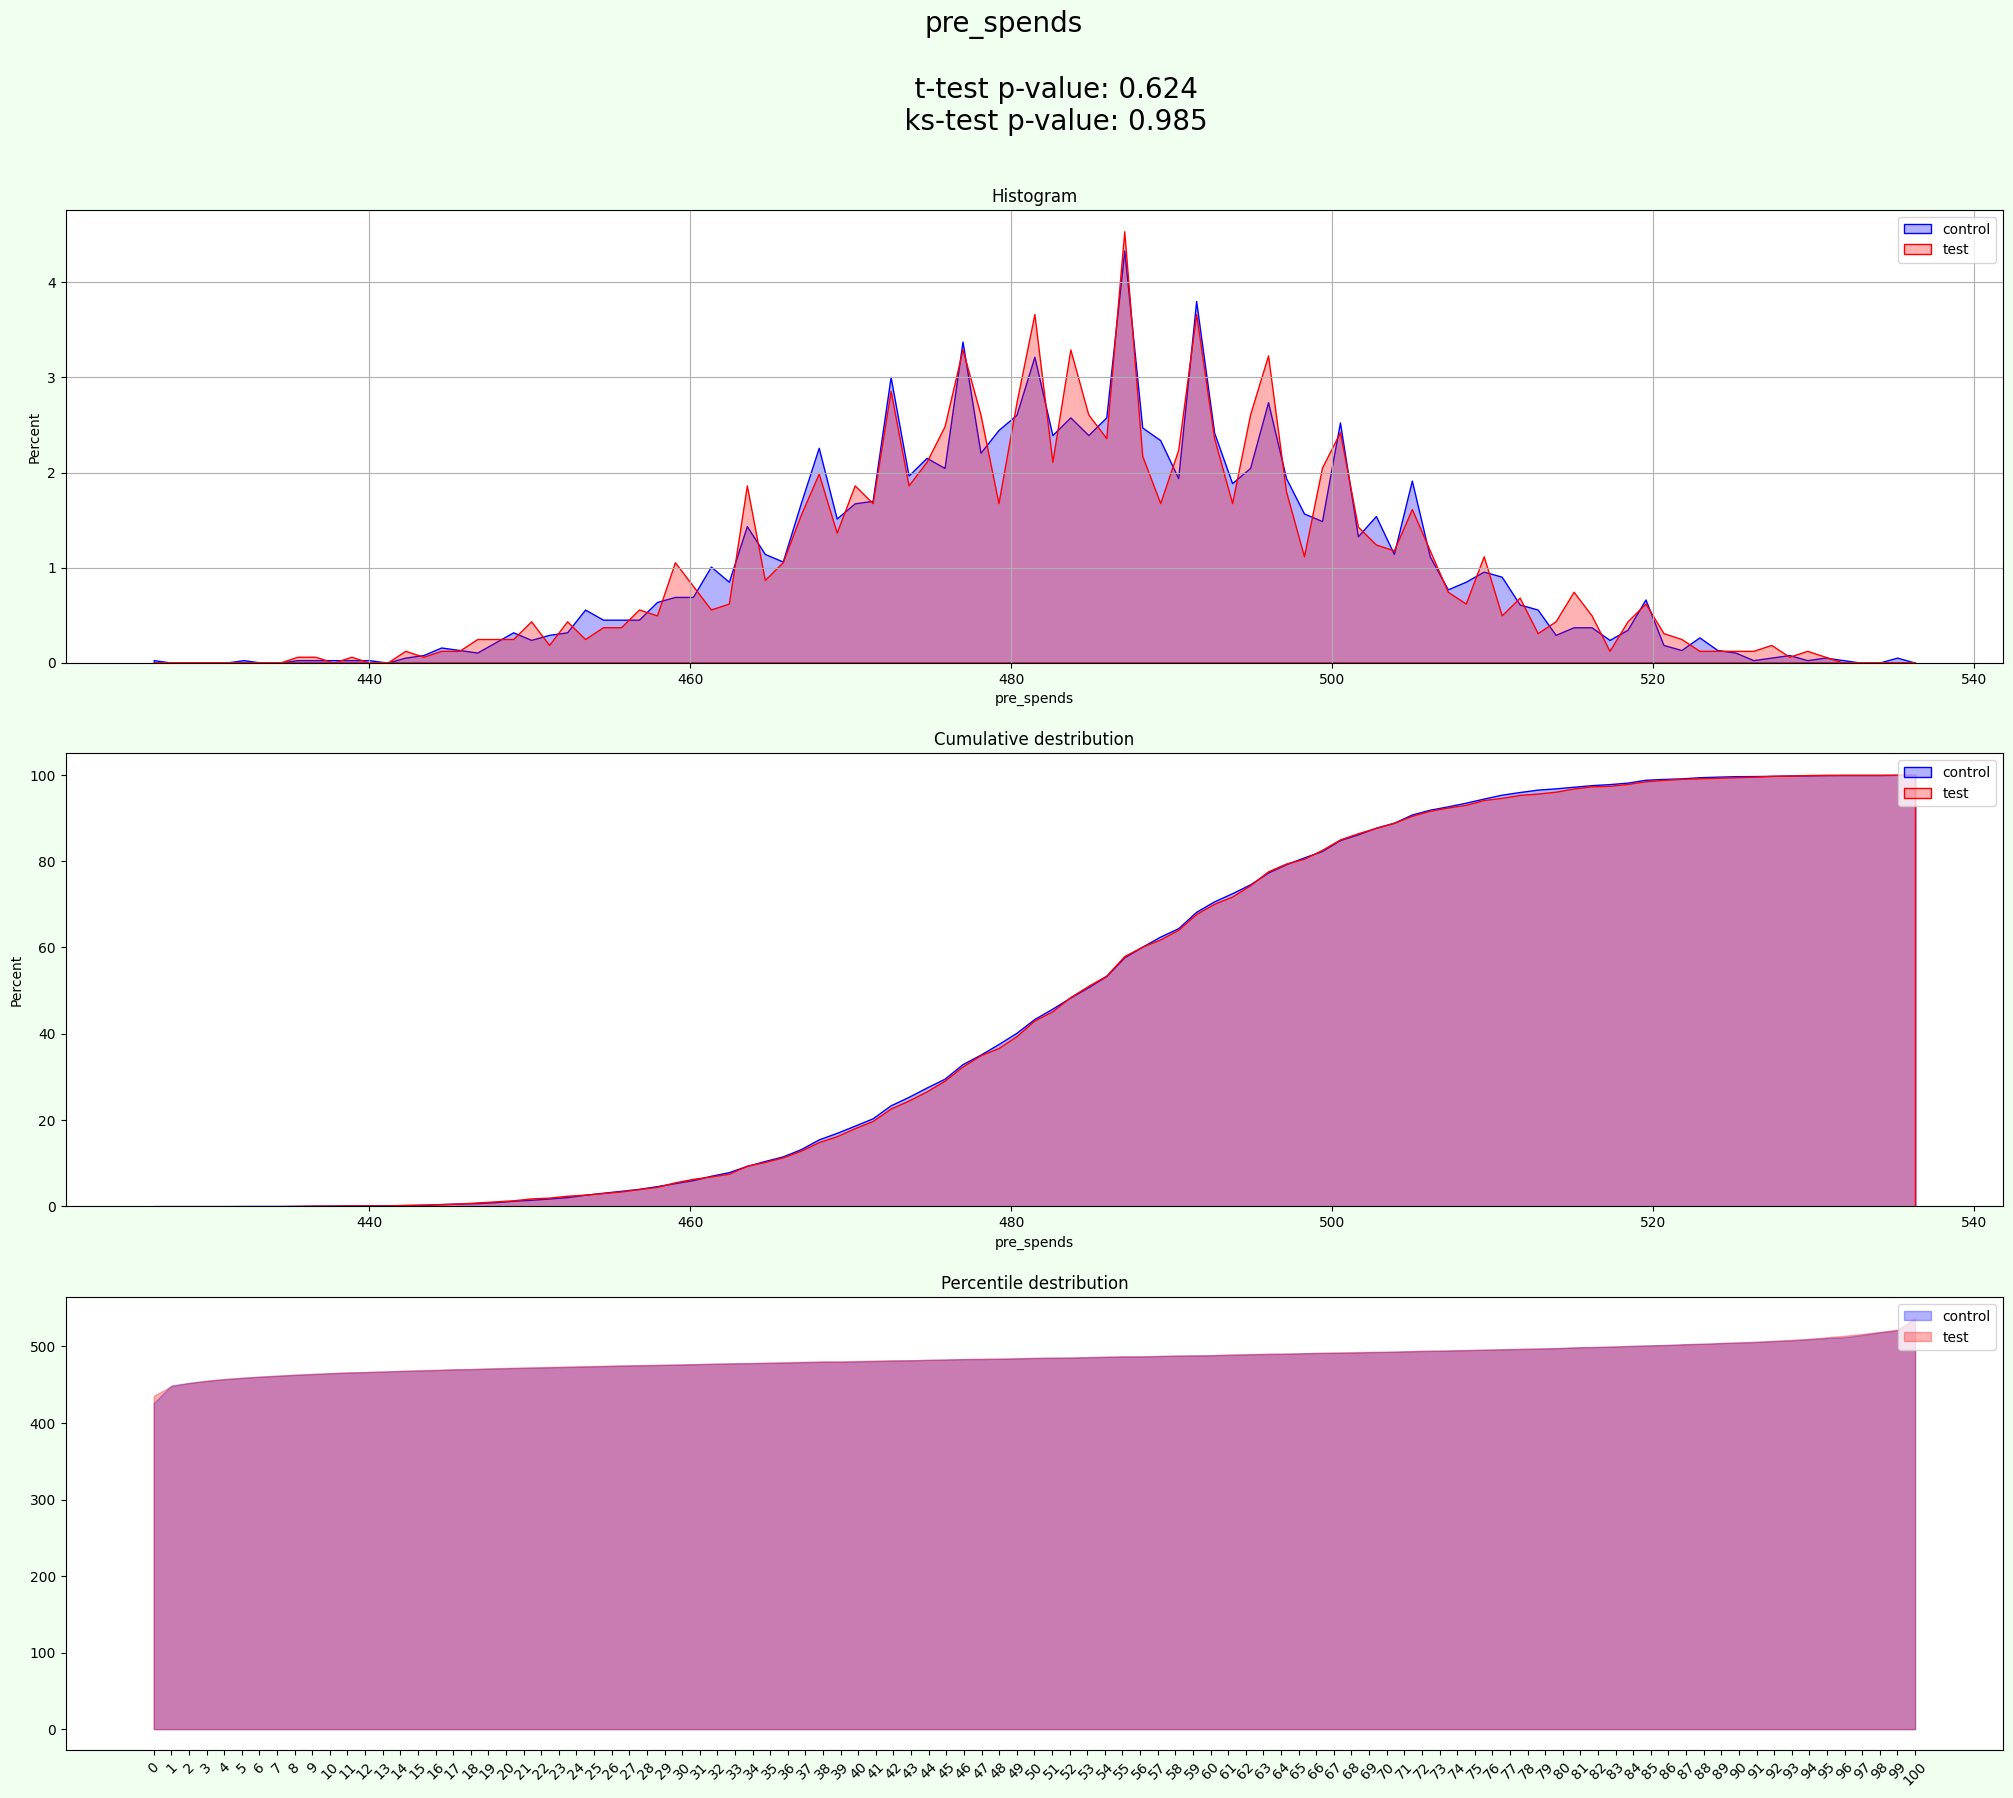

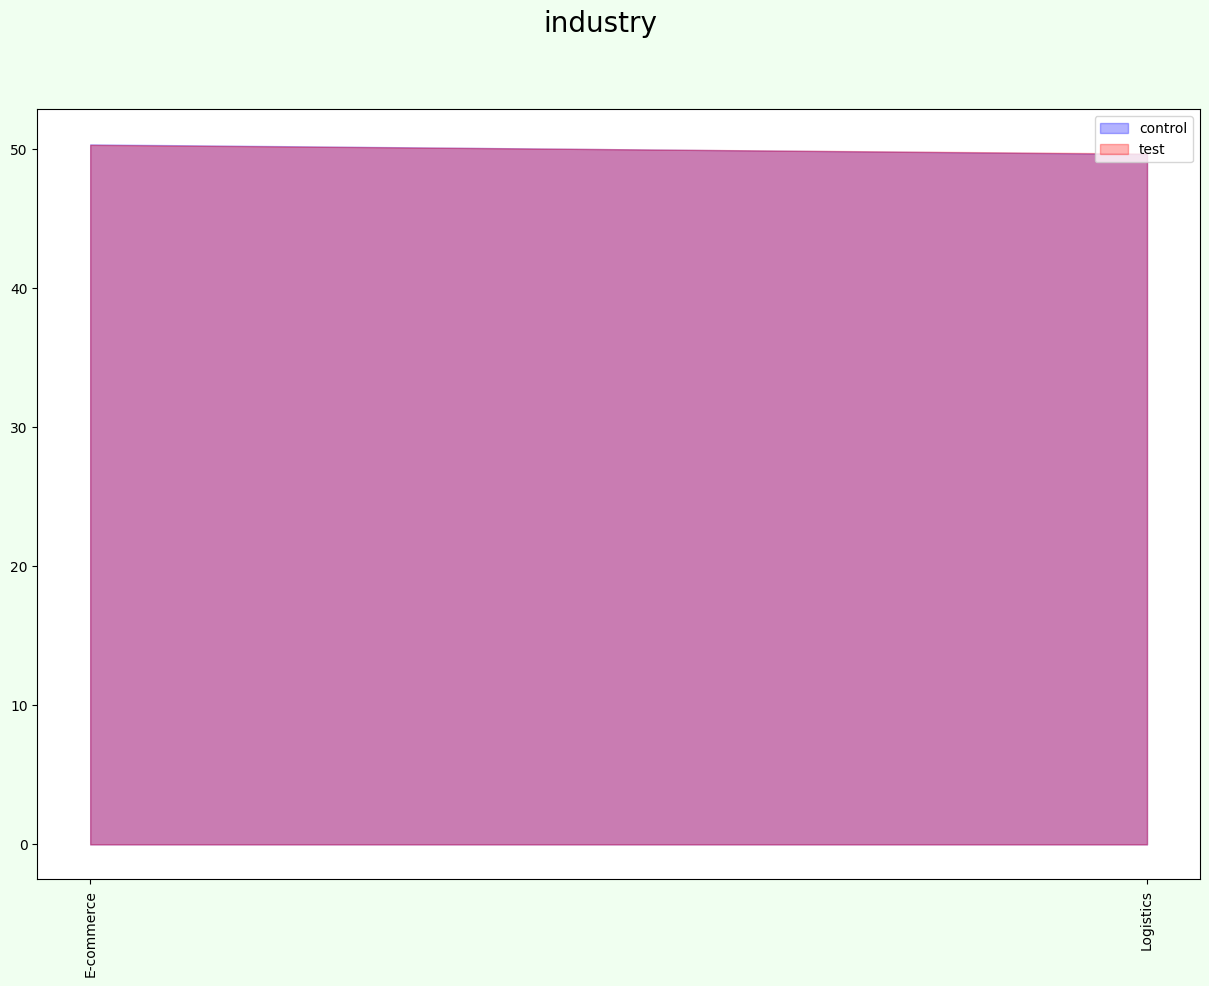

In [34]:
result = experiment.process(data=data, test_size=0.3, iterations=20)

In [35]:
result['split']['group'].value_counts(normalize=True)

group
control   0.70
test      0.30
Name: proportion, dtype: float64

In [36]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,427.97,428.61,0.64,0.15,0.45,0.75,False,False,484.83,...,False,70.02,29.98,3760,1610,0.46,0.79,0.00,0.00,0.68
1,1,428.12,428.25,0.12,0.03,0.88,0.83,False,False,485.07,...,False,70.02,29.98,3760,1610,0.60,0.90,0.00,0.00,0.80
2,2,428.17,428.15,-0.02,-0.01,0.98,0.98,False,False,484.86,...,False,70.02,29.98,3760,1610,0.80,0.98,0.00,0.00,0.92
3,3,428.10,428.30,0.20,0.05,0.81,1.00,False,False,484.99,...,False,70.02,29.98,3760,1610,0.73,0.84,0.00,0.00,0.80
4,4,427.82,428.95,1.13,0.26,0.18,0.65,False,False,484.96,...,False,70.02,29.98,3760,1610,0.50,0.81,0.00,0.00,0.71
5,5,428.41,427.59,-0.82,-0.19,0.33,0.77,False,False,484.96,...,False,70.02,29.98,3760,1610,0.57,0.80,0.00,0.00,0.72
6,6,427.92,428.72,0.80,0.19,0.35,0.03,False,True,484.76,...,False,70.02,29.98,3760,1610,0.29,0.18,0.00,50.00,0.22
7,7,428.30,427.83,-0.47,-0.11,0.58,0.46,False,False,484.93,...,False,70.02,29.98,3760,1610,0.76,0.57,0.00,0.00,0.63
8,8,428.60,427.14,-1.46,-0.34,0.08,0.02,False,True,485.03,...,False,70.02,29.98,3760,1610,0.28,0.23,0.00,50.00,0.24
9,9,428.45,427.50,-0.95,-0.22,0.26,0.37,False,False,485.07,...,False,70.02,29.98,3760,1610,0.28,0.47,0.00,0.00,0.40



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.10,1.00,0.00
pre_spends,0.05,0.00,1.00,0.00
mean,0.05,0.05,1.00,0.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,13,0,0,508.50,424.22,36.00,F,E-commerce,test
1,15,0,0,464.50,421.67,38.00,F,E-commerce,test
2,25,0,0,499.50,425.78,56.00,M,Logistics,test
3,27,0,0,468.50,432.22,NaN,M,E-commerce,test
4,31,0,0,505.00,427.22,54.00,F,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9987,0,0,467.00,431.56,48.00,M,Logistics,control
5366,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5367,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5368,9991,0,0,482.50,421.89,23.00,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.17,428.15,-0.02,-0.01,0.98,0.98,False,False
pre_spends,484.86,485.09,0.23,0.05,0.62,0.99,False,False



split_stat


control %              70.02
test %                 29.98
control size            3760
test size               1610
t-test mean p-value     0.80
ks-test mean p-value    0.98
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.92
Name: 2, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK


## MDE    
this is the boundary value of the effect, for which it makes sense to introduce some changes. 

In [8]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'
mde_target = 'post_spends'

In [9]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

Single experiment of data splitting for MDE calculation. 

_P.s. [None] is the number of random state. You can change it like sampling_metrics(data, random_state=42) and get result with [42] instead of [None]_ 

In [10]:
splitted_data = experiment.sampling_metrics(data)['data_from_experiment'][None]
splitted_data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,10,0,0,522.50,416.22,64.00,M,E-commerce,test
2,13,0,0,508.50,424.22,36.00,F,E-commerce,test
3,15,0,0,464.50,421.67,38.00,F,E-commerce,test
4,21,0,0,489.00,433.11,30.00,M,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9985,0,0,484.00,411.33,NaN,F,E-commerce,control
5366,9986,0,0,494.00,432.11,54.00,NaN,Logistics,control
5367,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5368,9990,0,0,490.00,426.00,18.00,M,E-commerce,control


<Axes: >

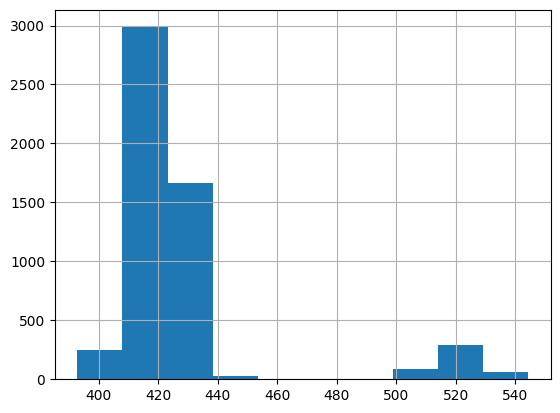

In [15]:
splitted_data[mde_target].hist()

You can evaluate minimum detectable effect for your data. This will be the smallest true effect obtained from the changes, which the statistical criterion will be able to detect with confidence 

In [16]:
mde = experiment.calc_mde(data=splitted_data, target_field=mde_target)
mde

4.338015965804193

You can also calculate the amount of data you need to have in order to determine the minimum effect of the test.

In [18]:
experiment.calc_sample_size(data=splitted_data, target_field=mde_target, mde=(0.5, 0.7))